Nvidia GPU's = only GPU's that support **CUDA** = language + framework used to do deep learning

In [1]:
!pip install fastai

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [2]:
## remove dir if present already, re-clone fastai repo
!rm -r -f fastai
!git clone https://github.com/fastai/fastai.git

Cloning into 'fastai'...
remote: Counting objects: 5147, done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 5147 (delta 1), reused 2 (delta 0), pack-reused 5137
Receiving objects: 100% (5147/5147), 188.14 MiB | 22.52 MiB/s, done.
Resolving deltas: 100% (3246/3246), done.


In [0]:
# make sure conda is up to date
#!conda env update

In [4]:
!cd fastai | ls
# make sure fastai is up to date
#! git pull

data  datalab  dogscats.zip  fastai


In [0]:
%matplotlib inline

In [6]:
### DO THIS EVERY TIME WE CONNECT TO NEW VM
## default environment doesn’t have Pytorch or torchvision so install manually
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl | pip install torchvision

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 996, in emit
    self.flush()
  File "/usr/lib/python3.6/logging/__init__.py", line 976, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/usr/local/bin/pip3", line 11, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/__init__.py", line 246, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/basecommand.py", line 228, in main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 291, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/resolve.py", line 103, in resolve
    self._resolve_one(requirement_set, req)
  File "/

## Image Classification w/ **Convolutional Neural Networks (CNN)**

### Dogs v. Cats

Will try to enter Dogs v. Cats on Kaggle: 25k labelled photos available for training, 12.5k in test set. At time of competition launch (2013), state of the art = 80% accuracy.

In [7]:
# fixed imread error
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install --no-cache-dir -I pillow
import PIL._imaging

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
    100% |████████████████████████████████| 2.0MB 30.3MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


In [0]:
import sys

# get to directory with .py files
sys.path.insert(0, './fastai/fastai/')

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [9]:
## remove data and dataset if present already, re-download, dataset, remake data folder, unzip data into /data
!rm -r -f data && rm -f dogscats.zip && mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

## import libraries
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np # linear algebra and data analysis
np.set_printoptions(precision = 4, linewidth = 100)
from matplotlib import pyplot as plt

--2018-05-14 22:54:52--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip         90%[=================>  ] 739.18M  7.46MB/s    eta 6s     

dogscats.zip        100%[===================>] 817.50M  8.48MB/s    in 60s     

2018-05-14 22:55:53 (13.6 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: data/dogscats/
   creating: data/dogscats/sample/
   creating: data/dogscats/sample/train/
   creating: data/dogscats/sample/train/cats/
  inflating: data/dogscats/sample/train/cats/cat.2921.jpg  
  inflating: data/dogscats/sample/train/cats/cat.394.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4865.jpg  
  inflating: data/dogscats/sample/train/cats/cat.3570.jpg  
  inflating: data/dogscats/sample/train/cats/cat.2266.jpg  
  inflating: data/dogscats/sample/train/cats/cat.9021.jpg  
  inflating: data/dogscats/sample/train/cats/cat.11737.jpg  
  inflating: data/dogscats/sample/train/cats/cat.4600.jpg  
   creating: data/dogscats/sample/train/dogs/
  inflating: data/dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: data/dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: data/dogs

  inflating: data/dogscats/train/cats/cat.68.jpg  
  inflating: data/dogscats/train/cats/cat.2307.jpg  
  inflating: data/dogscats/train/cats/cat.1078.jpg  
  inflating: data/dogscats/train/cats/cat.5008.jpg  
  inflating: data/dogscats/train/cats/cat.2013.jpg  
  inflating: data/dogscats/train/cats/cat.5505.jpg  
  inflating: data/dogscats/train/cats/cat.980.jpg  
  inflating: data/dogscats/train/cats/cat.8390.jpg  
  inflating: data/dogscats/train/cats/cat.1971.jpg  
  inflating: data/dogscats/train/cats/cat.11247.jpg  
  inflating: data/dogscats/train/cats/cat.10178.jpg  
  inflating: data/dogscats/train/cats/cat.5776.jpg  
  inflating: data/dogscats/train/cats/cat.11890.jpg  
  inflating: data/dogscats/train/cats/cat.7723.jpg  
  inflating: data/dogscats/train/cats/cat.7823.jpg  
  inflating: data/dogscats/train/cats/cat.10719.jpg  
  inflating: data/dogscats/train/cats/cat.7804.jpg  
  inflating: data/dogscats/train/cats/cat.3498.jpg  
  inflating: data/dogscats/train/cats/cat.127


  inflating: data/dogscats/train/cats/cat.1395.jpg  
  inflating: data/dogscats/train/cats/cat.6760.jpg  
  inflating: data/dogscats/train/cats/cat.1857.jpg  
  inflating: data/dogscats/train/cats/cat.11934.jpg  
  inflating: data/dogscats/train/cats/cat.4723.jpg  
  inflating: data/dogscats/train/cats/cat.9964.jpg  
  inflating: data/dogscats/train/cats/cat.12243.jpg  
  inflating: data/dogscats/train/cats/cat.10995.jpg  
  inflating: data/dogscats/train/cats/cat.11088.jpg  
  inflating: data/dogscats/train/cats/cat.1484.jpg  
  inflating: data/dogscats/train/cats/cat.1854.jpg  
  inflating: data/dogscats/train/cats/cat.11931.jpg  
  inflating: data/dogscats/train/cats/cat.4878.jpg  
  inflating: data/dogscats/train/cats/cat.1222.jpg  
  inflating: data/dogscats/train/cats/cat.12200.jpg  
  inflating: data/dogscats/train/cats/cat.113.jpg  
  inflating: data/dogscats/train/cats/cat.729.jpg  
  inflating: data/dogscats/train/cats/cat.12241.jpg  
  inflating: data/dogscats/train/cats/ca


  inflating: data/dogscats/train/cats/cat.8498.jpg  
  inflating: data/dogscats/train/cats/cat.599.jpg  
  inflating: data/dogscats/train/cats/cat.6992.jpg  
  inflating: data/dogscats/train/cats/cat.800.jpg  
  inflating: data/dogscats/train/cats/cat.9332.jpg  
  inflating: data/dogscats/train/cats/cat.1796.jpg  
  inflating: data/dogscats/train/cats/cat.6982.jpg  
  inflating: data/dogscats/train/cats/cat.8281.jpg  
  inflating: data/dogscats/train/cats/cat.9841.jpg  
  inflating: data/dogscats/train/cats/cat.180.jpg  
  inflating: data/dogscats/train/cats/cat.695.jpg  
  inflating: data/dogscats/train/cats/cat.11808.jpg  
  inflating: data/dogscats/train/cats/cat.60.jpg  
  inflating: data/dogscats/train/cats/cat.2259.jpg  
  inflating: data/dogscats/train/cats/cat.3347.jpg  
  inflating: data/dogscats/train/cats/cat.7439.jpg  
  inflating: data/dogscats/train/cats/cat.5817.jpg  
  inflating: data/dogscats/train/cats/cat.6531.jpg  
  inflating: data/dogscats/train/cats/cat.1181.jpg


  inflating: data/dogscats/train/cats/cat.7737.jpg  
  inflating: data/dogscats/train/cats/cat.10336.jpg  
  inflating: data/dogscats/train/cats/cat.6216.jpg  
  inflating: data/dogscats/train/cats/cat.1420.jpg  
  inflating: data/dogscats/train/cats/cat.7461.jpg  
  inflating: data/dogscats/train/cats/cat.3858.jpg  
  inflating: data/dogscats/train/cats/cat.7131.jpg  
  inflating: data/dogscats/train/cats/cat.4326.jpg  
  inflating: data/dogscats/train/cats/cat.1789.jpg  
  inflating: data/dogscats/train/cats/cat.10346.jpg  
  inflating: data/dogscats/train/cats/cat.11777.jpg  
  inflating: data/dogscats/train/cats/cat.4805.jpg  
  inflating: data/dogscats/train/cats/cat.6972.jpg  
  inflating: data/dogscats/train/cats/cat.4261.jpg  
  inflating: data/dogscats/train/cats/cat.3899.jpg  
  inflating: data/dogscats/train/cats/cat.7137.jpg  
  inflating: data/dogscats/train/cats/cat.7819.jpg  
  inflating: data/dogscats/train/cats/cat.5123.jpg  
  inflating: data/dogscats/train/cats/cat.

  inflating: data/dogscats/train/cats/cat.707.jpg  
  inflating: data/dogscats/train/cats/cat.540.jpg  
  inflating: data/dogscats/train/cats/cat.6656.jpg  
  inflating: data/dogscats/train/cats/cat.1496.jpg  
  inflating: data/dogscats/train/cats/cat.6392.jpg  
  inflating: data/dogscats/train/cats/cat.5799.jpg  
  inflating: data/dogscats/train/cats/cat.8909.jpg  
  inflating: data/dogscats/train/cats/cat.1037.jpg  
  inflating: data/dogscats/train/cats/cat.11425.jpg  
  inflating: data/dogscats/train/cats/cat.10347.jpg  
  inflating: data/dogscats/train/cats/cat.8778.jpg  
  inflating: data/dogscats/train/cats/cat.7001.jpg  
  inflating: data/dogscats/train/cats/cat.7926.jpg  
  inflating: data/dogscats/train/cats/cat.7978.jpg  
  inflating: data/dogscats/train/cats/cat.7169.jpg  
  inflating: data/dogscats/train/cats/cat.12070.jpg  
  inflating: data/dogscats/train/cats/cat.7532.jpg  
  inflating: data/dogscats/train/cats/cat.1328.jpg  
  inflating: data/dogscats/train/cats/cat.105


  inflating: data/dogscats/train/cats/cat.7682.jpg  
  inflating: data/dogscats/train/cats/cat.4366.jpg  
  inflating: data/dogscats/train/cats/cat.9427.jpg  
  inflating: data/dogscats/train/cats/cat.297.jpg  
  inflating: data/dogscats/train/cats/cat.174.jpg  
  inflating: data/dogscats/train/cats/cat.2321.jpg  
  inflating: data/dogscats/train/cats/cat.10905.jpg  
  inflating: data/dogscats/train/cats/cat.10945.jpg  
  inflating: data/dogscats/train/cats/cat.5689.jpg  
  inflating: data/dogscats/train/cats/cat.9416.jpg  
  inflating: data/dogscats/train/cats/cat.10174.jpg  
  inflating: data/dogscats/train/cats/cat.2356.jpg  
  inflating: data/dogscats/train/cats/cat.5083.jpg  
  inflating: data/dogscats/train/cats/cat.10402.jpg  
  inflating: data/dogscats/train/cats/cat.12087.jpg  
  inflating: data/dogscats/train/cats/cat.11732.jpg  
  inflating: data/dogscats/train/cats/cat.7338.jpg  
  inflating: data/dogscats/train/cats/cat.3039.jpg  
  inflating: data/dogscats/train/cats/cat


  inflating: data/dogscats/train/cats/cat.11700.jpg  
  inflating: data/dogscats/train/cats/cat.5595.jpg  
  inflating: data/dogscats/train/cats/cat.9622.jpg  
  inflating: data/dogscats/train/cats/cat.3843.jpg  
  inflating: data/dogscats/train/cats/cat.9056.jpg  
  inflating: data/dogscats/train/cats/cat.11362.jpg  
  inflating: data/dogscats/train/cats/cat.436.jpg  
  inflating: data/dogscats/train/cats/cat.236.jpg  
  inflating: data/dogscats/train/cats/cat.210.jpg  
  inflating: data/dogscats/train/cats/cat.2781.jpg  
  inflating: data/dogscats/train/cats/cat.6661.jpg  
  inflating: data/dogscats/train/cats/cat.7024.jpg  
  inflating: data/dogscats/train/cats/cat.7628.jpg  
  inflating: data/dogscats/train/cats/cat.10392.jpg  
  inflating: data/dogscats/train/cats/cat.10031.jpg  
  inflating: data/dogscats/train/cats/cat.1850.jpg  
  inflating: data/dogscats/train/cats/cat.12197.jpg  
  inflating: data/dogscats/train/cats/cat.5283.jpg  
  inflating: data/dogscats/train/cats/cat.6


  inflating: data/dogscats/train/cats/cat.11146.jpg  
  inflating: data/dogscats/train/cats/cat.4928.jpg  
  inflating: data/dogscats/train/cats/cat.8410.jpg  
  inflating: data/dogscats/train/cats/cat.10765.jpg  
  inflating: data/dogscats/train/cats/cat.6966.jpg  
  inflating: data/dogscats/train/cats/cat.1243.jpg  
  inflating: data/dogscats/train/cats/cat.64.jpg  
  inflating: data/dogscats/train/cats/cat.10942.jpg  
  inflating: data/dogscats/train/cats/cat.11426.jpg  
  inflating: data/dogscats/train/cats/cat.5208.jpg  
  inflating: data/dogscats/train/cats/cat.3884.jpg  
  inflating: data/dogscats/train/cats/cat.1650.jpg  
  inflating: data/dogscats/train/cats/cat.3542.jpg  
  inflating: data/dogscats/train/cats/cat.1210.jpg  
  inflating: data/dogscats/train/cats/cat.9897.jpg  
  inflating: data/dogscats/train/cats/cat.9546.jpg  
  inflating: data/dogscats/train/cats/cat.6258.jpg  
  inflating: data/dogscats/train/cats/cat.4979.jpg  
  inflating: data/dogscats/train/cats/cat.7

  inflating: data/dogscats/train/cats/cat.10252.jpg  
  inflating: data/dogscats/train/cats/cat.9769.jpg  
  inflating: data/dogscats/train/cats/cat.7452.jpg  
  inflating: data/dogscats/train/cats/cat.4014.jpg  
  inflating: data/dogscats/train/cats/cat.2517.jpg  
  inflating: data/dogscats/train/cats/cat.5493.jpg  
  inflating: data/dogscats/train/cats/cat.8121.jpg  
  inflating: data/dogscats/train/cats/cat.4636.jpg  
  inflating: data/dogscats/train/cats/cat.1474.jpg  
  inflating: data/dogscats/train/cats/cat.3496.jpg  
  inflating: data/dogscats/train/cats/cat.6228.jpg  
  inflating: data/dogscats/train/cats/cat.5155.jpg  
  inflating: data/dogscats/train/cats/cat.9229.jpg  
  inflating: data/dogscats/train/cats/cat.8797.jpg  
  inflating: data/dogscats/train/cats/cat.3528.jpg  
  inflating: data/dogscats/train/cats/cat.4908.jpg  
  inflating: data/dogscats/train/cats/cat.8125.jpg  
  inflating: data/dogscats/train/cats/cat.6990.jpg  
  inflating: data/dogscats/train/cats/cat.855

  inflating: data/dogscats/train/cats/cat.11923.jpg  
  inflating: data/dogscats/train/cats/cat.8549.jpg  
  inflating: data/dogscats/train/cats/cat.11363.jpg  
  inflating: data/dogscats/train/cats/cat.11771.jpg  
  inflating: data/dogscats/train/cats/cat.307.jpg  
  inflating: data/dogscats/train/cats/cat.9076.jpg  
  inflating: data/dogscats/train/cats/cat.5946.jpg  
  inflating: data/dogscats/train/cats/cat.7403.jpg  
  inflating: data/dogscats/train/cats/cat.11829.jpg  
  inflating: data/dogscats/train/cats/cat.8404.jpg  
  inflating: data/dogscats/train/cats/cat.12300.jpg  
  inflating: data/dogscats/train/cats/cat.10111.jpg  
  inflating: data/dogscats/train/cats/cat.7315.jpg  
  inflating: data/dogscats/train/cats/cat.1044.jpg  
  inflating: data/dogscats/train/cats/cat.7165.jpg  
  inflating: data/dogscats/train/cats/cat.819.jpg  
  inflating: data/dogscats/train/cats/cat.11708.jpg  
  inflating: data/dogscats/train/cats/cat.96.jpg  
  inflating: data/dogscats/train/cats/cat.3

  inflating: data/dogscats/train/cats/cat.3162.jpg  
  inflating: data/dogscats/train/cats/cat.6712.jpg  
  inflating: data/dogscats/train/cats/cat.3752.jpg  
  inflating: data/dogscats/train/cats/cat.3054.jpg  
  inflating: data/dogscats/train/cats/cat.4959.jpg  
  inflating: data/dogscats/train/cats/cat.10971.jpg  
  inflating: data/dogscats/train/cats/cat.33.jpg  
  inflating: data/dogscats/train/cats/cat.9277.jpg  
  inflating: data/dogscats/train/cats/cat.24.jpg  
  inflating: data/dogscats/train/cats/cat.7427.jpg  
  inflating: data/dogscats/train/cats/cat.10745.jpg  
  inflating: data/dogscats/train/cats/cat.10019.jpg  
  inflating: data/dogscats/train/cats/cat.7051.jpg  
  inflating: data/dogscats/train/cats/cat.11025.jpg  
  inflating: data/dogscats/train/cats/cat.1687.jpg  
  inflating: data/dogscats/train/cats/cat.11259.jpg  
  inflating: data/dogscats/train/cats/cat.8306.jpg  
  inflating: data/dogscats/train/cats/cat.3351.jpg  
  inflating: data/dogscats/train/cats/cat.402

  inflating: data/dogscats/train/cats/cat.2373.jpg  
  inflating: data/dogscats/train/cats/cat.5915.jpg  
  inflating: data/dogscats/train/cats/cat.3775.jpg  
  inflating: data/dogscats/train/cats/cat.10113.jpg  
  inflating: data/dogscats/train/cats/cat.9039.jpg  
  inflating: data/dogscats/train/cats/cat.9846.jpg  
  inflating: data/dogscats/train/cats/cat.8145.jpg  
  inflating: data/dogscats/train/cats/cat.6981.jpg  
  inflating: data/dogscats/train/cats/cat.3385.jpg  
  inflating: data/dogscats/train/cats/cat.2963.jpg  
  inflating: data/dogscats/train/cats/cat.10616.jpg  
  inflating: data/dogscats/train/cats/cat.10320.jpg  
  inflating: data/dogscats/train/cats/cat.8659.jpg  
  inflating: data/dogscats/train/cats/cat.380.jpg  
  inflating: data/dogscats/train/cats/cat.11293.jpg  
  inflating: data/dogscats/train/cats/cat.11273.jpg  
  inflating: data/dogscats/train/cats/cat.9621.jpg  
  inflating: data/dogscats/train/cats/cat.11647.jpg  
  inflating: data/dogscats/train/cats/cat

  inflating: data/dogscats/train/cats/cat.6131.jpg  
  inflating: data/dogscats/train/cats/cat.9460.jpg  
  inflating: data/dogscats/train/cats/cat.7260.jpg  
  inflating: data/dogscats/train/cats/cat.4165.jpg  
  inflating: data/dogscats/train/cats/cat.5430.jpg  
  inflating: data/dogscats/train/cats/cat.6179.jpg  
  inflating: data/dogscats/train/cats/cat.8430.jpg  
  inflating: data/dogscats/train/cats/cat.5297.jpg  
  inflating: data/dogscats/train/cats/cat.10004.jpg  
  inflating: data/dogscats/train/cats/cat.5990.jpg  
  inflating: data/dogscats/train/cats/cat.11204.jpg  
  inflating: data/dogscats/train/cats/cat.5764.jpg  
  inflating: data/dogscats/train/cats/cat.12290.jpg  
  inflating: data/dogscats/train/cats/cat.4051.jpg  
  inflating: data/dogscats/train/cats/cat.8506.jpg  
  inflating: data/dogscats/train/cats/cat.7659.jpg  
  inflating: data/dogscats/train/cats/cat.1081.jpg  
  inflating: data/dogscats/train/cats/cat.7674.jpg  
  inflating: data/dogscats/train/cats/cat.3

  inflating: data/dogscats/train/cats/cat.1968.jpg  
  inflating: data/dogscats/train/cats/cat.11727.jpg  
  inflating: data/dogscats/train/cats/cat.8382.jpg  
  inflating: data/dogscats/train/cats/cat.11490.jpg  
  inflating: data/dogscats/train/cats/cat.9544.jpg  
  inflating: data/dogscats/train/cats/cat.6987.jpg  
  inflating: data/dogscats/train/cats/cat.4881.jpg  
  inflating: data/dogscats/train/cats/cat.12196.jpg  
  inflating: data/dogscats/train/cats/cat.12021.jpg  
  inflating: data/dogscats/train/cats/cat.9267.jpg  
  inflating: data/dogscats/train/cats/cat.11579.jpg  
  inflating: data/dogscats/train/cats/cat.3501.jpg  
  inflating: data/dogscats/train/cats/cat.1002.jpg  
  inflating: data/dogscats/train/cats/cat.8029.jpg  
  inflating: data/dogscats/train/cats/cat.6015.jpg  
  inflating: data/dogscats/train/cats/cat.2879.jpg  
  inflating: data/dogscats/train/cats/cat.6603.jpg  
  inflating: data/dogscats/train/cats/cat.10692.jpg  
  inflating: data/dogscats/train/cats/ca

  inflating: data/dogscats/train/cats/cat.5953.jpg  
  inflating: data/dogscats/train/cats/cat.832.jpg  
  inflating: data/dogscats/train/cats/cat.12486.jpg  
  inflating: data/dogscats/train/cats/cat.8101.jpg  
  inflating: data/dogscats/train/cats/cat.11071.jpg  
  inflating: data/dogscats/train/cats/cat.1043.jpg  
  inflating: data/dogscats/train/cats/cat.5140.jpg  
  inflating: data/dogscats/train/cats/cat.2148.jpg  
  inflating: data/dogscats/train/cats/cat.572.jpg  
  inflating: data/dogscats/train/cats/cat.6808.jpg  
  inflating: data/dogscats/train/cats/cat.7768.jpg  
  inflating: data/dogscats/train/cats/cat.2408.jpg  
  inflating: data/dogscats/train/cats/cat.2490.jpg  
  inflating: data/dogscats/train/cats/cat.10078.jpg  
  inflating: data/dogscats/train/cats/cat.5469.jpg  
  inflating: data/dogscats/train/cats/cat.874.jpg  
  inflating: data/dogscats/train/cats/cat.11569.jpg  
  inflating: data/dogscats/train/cats/cat.3871.jpg  
  inflating: data/dogscats/train/cats/cat.715

  inflating: data/dogscats/train/cats/cat.8139.jpg  
  inflating: data/dogscats/train/cats/cat.940.jpg  
  inflating: data/dogscats/train/cats/cat.1238.jpg  
  inflating: data/dogscats/train/cats/cat.3155.jpg  
  inflating: data/dogscats/train/cats/cat.4330.jpg  
  inflating: data/dogscats/train/cats/cat.1716.jpg  
  inflating: data/dogscats/train/cats/cat.939.jpg  
  inflating: data/dogscats/train/cats/cat.845.jpg  
  inflating: data/dogscats/train/cats/cat.6551.jpg  
  inflating: data/dogscats/train/cats/cat.12318.jpg  
  inflating: data/dogscats/train/cats/cat.6276.jpg  
  inflating: data/dogscats/train/cats/cat.5774.jpg  
  inflating: data/dogscats/train/cats/cat.10705.jpg  
  inflating: data/dogscats/train/cats/cat.11891.jpg  
  inflating: data/dogscats/train/cats/cat.8487.jpg  
  inflating: data/dogscats/train/cats/cat.9118.jpg  
  inflating: data/dogscats/train/cats/cat.649.jpg  
  inflating: data/dogscats/train/cats/cat.11736.jpg  
  inflating: data/dogscats/train/cats/cat.8939


  inflating: data/dogscats/train/cats/cat.11521.jpg  
  inflating: data/dogscats/train/cats/cat.7749.jpg  
  inflating: data/dogscats/train/cats/cat.4527.jpg  
  inflating: data/dogscats/train/cats/cat.8716.jpg  
  inflating: data/dogscats/train/cats/cat.6790.jpg  
  inflating: data/dogscats/train/cats/cat.7274.jpg  
  inflating: data/dogscats/train/cats/cat.2231.jpg  
  inflating: data/dogscats/train/cats/cat.12293.jpg  
  inflating: data/dogscats/train/cats/cat.11320.jpg  
  inflating: data/dogscats/train/cats/cat.5158.jpg  
  inflating: data/dogscats/train/cats/cat.964.jpg  
  inflating: data/dogscats/train/cats/cat.1891.jpg  
  inflating: data/dogscats/train/cats/cat.5241.jpg  
  inflating: data/dogscats/train/cats/cat.3531.jpg  
  inflating: data/dogscats/train/cats/cat.4123.jpg  
  inflating: data/dogscats/train/cats/cat.4885.jpg  
  inflating: data/dogscats/train/cats/cat.5209.jpg  
  inflating: data/dogscats/train/cats/cat.2460.jpg  
  inflating: data/dogscats/train/cats/cat.1


  inflating: data/dogscats/train/cats/cat.6549.jpg  
  inflating: data/dogscats/train/cats/cat.2426.jpg  
  inflating: data/dogscats/train/cats/cat.7317.jpg  
  inflating: data/dogscats/train/cats/cat.8252.jpg  
  inflating: data/dogscats/train/cats/cat.12384.jpg  
  inflating: data/dogscats/train/cats/cat.11168.jpg  
  inflating: data/dogscats/train/cats/cat.7149.jpg  
  inflating: data/dogscats/train/cats/cat.3800.jpg  
  inflating: data/dogscats/train/cats/cat.2038.jpg  
  inflating: data/dogscats/train/cats/cat.6683.jpg  
  inflating: data/dogscats/train/cats/cat.11684.jpg  
  inflating: data/dogscats/train/cats/cat.10197.jpg  
  inflating: data/dogscats/train/cats/cat.11962.jpg  
  inflating: data/dogscats/train/cats/cat.6518.jpg  
  inflating: data/dogscats/train/cats/cat.5167.jpg  
  inflating: data/dogscats/train/cats/cat.3240.jpg  
  inflating: data/dogscats/train/cats/cat.9722.jpg  
  inflating: data/dogscats/train/cats/cat.7327.jpg  
  inflating: data/dogscats/train/cats/ca


  inflating: data/dogscats/train/dogs/dog.12283.jpg  
  inflating: data/dogscats/train/dogs/dog.2879.jpg  
  inflating: data/dogscats/train/dogs/dog.1611.jpg  
  inflating: data/dogscats/train/dogs/dog.5577.jpg  
  inflating: data/dogscats/train/dogs/dog.8796.jpg  
  inflating: data/dogscats/train/dogs/dog.12445.jpg  
  inflating: data/dogscats/train/dogs/dog.2329.jpg  
  inflating: data/dogscats/train/dogs/dog.6932.jpg  
  inflating: data/dogscats/train/dogs/dog.11990.jpg  
  inflating: data/dogscats/train/dogs/dog.6072.jpg  
  inflating: data/dogscats/train/dogs/dog.8830.jpg  
  inflating: data/dogscats/train/dogs/dog.7203.jpg  
  inflating: data/dogscats/train/dogs/dog.4949.jpg  
  inflating: data/dogscats/train/dogs/dog.3483.jpg  
  inflating: data/dogscats/train/dogs/dog.8207.jpg  
  inflating: data/dogscats/train/dogs/dog.1256.jpg  
  inflating: data/dogscats/train/dogs/dog.4871.jpg  
  inflating: data/dogscats/train/dogs/dog.5113.jpg  
  inflating: data/dogscats/train/dogs/dog.


  inflating: data/dogscats/train/dogs/dog.3207.jpg  
  inflating: data/dogscats/train/dogs/dog.5872.jpg  
  inflating: data/dogscats/train/dogs/dog.5095.jpg  
  inflating: data/dogscats/train/dogs/dog.11268.jpg  
  inflating: data/dogscats/train/dogs/dog.113.jpg  
  inflating: data/dogscats/train/dogs/dog.9954.jpg  
  inflating: data/dogscats/train/dogs/dog.5405.jpg  
  inflating: data/dogscats/train/dogs/dog.5012.jpg  
  inflating: data/dogscats/train/dogs/dog.7183.jpg  
  inflating: data/dogscats/train/dogs/dog.3279.jpg  
  inflating: data/dogscats/train/dogs/dog.603.jpg  
  inflating: data/dogscats/train/dogs/dog.5644.jpg  
  inflating: data/dogscats/train/dogs/dog.3050.jpg  
  inflating: data/dogscats/train/dogs/dog.10922.jpg  
  inflating: data/dogscats/train/dogs/dog.5262.jpg  
  inflating: data/dogscats/train/dogs/dog.2275.jpg  
  inflating: data/dogscats/train/dogs/dog.9181.jpg  
  inflating: data/dogscats/train/dogs/dog.10721.jpg  
  inflating: data/dogscats/train/dogs/dog.43


  inflating: data/dogscats/train/dogs/dog.1367.jpg  
  inflating: data/dogscats/train/dogs/dog.6257.jpg  
  inflating: data/dogscats/train/dogs/dog.11937.jpg  
  inflating: data/dogscats/train/dogs/dog.3862.jpg  
  inflating: data/dogscats/train/dogs/dog.9748.jpg  
  inflating: data/dogscats/train/dogs/dog.11955.jpg  
  inflating: data/dogscats/train/dogs/dog.1383.jpg  
  inflating: data/dogscats/train/dogs/dog.10108.jpg  
  inflating: data/dogscats/train/dogs/dog.4438.jpg  
  inflating: data/dogscats/train/dogs/dog.9570.jpg  
  inflating: data/dogscats/train/dogs/dog.1779.jpg  
  inflating: data/dogscats/train/dogs/dog.10085.jpg  
  inflating: data/dogscats/train/dogs/dog.7429.jpg  
  inflating: data/dogscats/train/dogs/dog.167.jpg  
  inflating: data/dogscats/train/dogs/dog.5823.jpg  
  inflating: data/dogscats/train/dogs/dog.7744.jpg  
  inflating: data/dogscats/train/dogs/dog.10598.jpg  
  inflating: data/dogscats/train/dogs/dog.8752.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.5982.jpg  
  inflating: data/dogscats/train/dogs/dog.562.jpg  
  inflating: data/dogscats/train/dogs/dog.12060.jpg  
  inflating: data/dogscats/train/dogs/dog.7710.jpg  
  inflating: data/dogscats/train/dogs/dog.5032.jpg  
  inflating: data/dogscats/train/dogs/dog.8247.jpg  
  inflating: data/dogscats/train/dogs/dog.2325.jpg  
  inflating: data/dogscats/train/dogs/dog.2397.jpg  
  inflating: data/dogscats/train/dogs/dog.2121.jpg  
  inflating: data/dogscats/train/dogs/dog.6501.jpg  
  inflating: data/dogscats/train/dogs/dog.3323.jpg  
  inflating: data/dogscats/train/dogs/dog.3906.jpg  
  inflating: data/dogscats/train/dogs/dog.4378.jpg  
  inflating: data/dogscats/train/dogs/dog.9353.jpg  
  inflating: data/dogscats/train/dogs/dog.9708.jpg  
  inflating: data/dogscats/train/dogs/dog.5920.jpg  
  inflating: data/dogscats/train/dogs/dog.1952.jpg  
  inflating: data/dogscats/train/dogs/dog.7005.jpg  
  inflating: data/dogscats/train/dogs/dog.377


  inflating: data/dogscats/train/dogs/dog.6988.jpg  
  inflating: data/dogscats/train/dogs/dog.11522.jpg  
  inflating: data/dogscats/train/dogs/dog.3831.jpg  
  inflating: data/dogscats/train/dogs/dog.9291.jpg  
  inflating: data/dogscats/train/dogs/dog.5536.jpg  
  inflating: data/dogscats/train/dogs/dog.7990.jpg  
  inflating: data/dogscats/train/dogs/dog.7572.jpg  
  inflating: data/dogscats/train/dogs/dog.6294.jpg  
  inflating: data/dogscats/train/dogs/dog.9065.jpg  
  inflating: data/dogscats/train/dogs/dog.9726.jpg  
  inflating: data/dogscats/train/dogs/dog.11523.jpg  
  inflating: data/dogscats/train/dogs/dog.11502.jpg  
  inflating: data/dogscats/train/dogs/dog.2697.jpg  
  inflating: data/dogscats/train/dogs/dog.2328.jpg  
  inflating: data/dogscats/train/dogs/dog.6481.jpg  
  inflating: data/dogscats/train/dogs/dog.10990.jpg  
  inflating: data/dogscats/train/dogs/dog.1879.jpg  
  inflating: data/dogscats/train/dogs/dog.9029.jpg  
  inflating: data/dogscats/train/dogs/dog


  inflating: data/dogscats/train/dogs/dog.3613.jpg  
  inflating: data/dogscats/train/dogs/dog.10281.jpg  
  inflating: data/dogscats/train/dogs/dog.2221.jpg  
  inflating: data/dogscats/train/dogs/dog.9284.jpg  
  inflating: data/dogscats/train/dogs/dog.3472.jpg  
  inflating: data/dogscats/train/dogs/dog.12418.jpg  
  inflating: data/dogscats/train/dogs/dog.9370.jpg  
  inflating: data/dogscats/train/dogs/dog.2523.jpg  
  inflating: data/dogscats/train/dogs/dog.8689.jpg  
  inflating: data/dogscats/train/dogs/dog.1184.jpg  
  inflating: data/dogscats/train/dogs/dog.6817.jpg  
  inflating: data/dogscats/train/dogs/dog.4089.jpg  
  inflating: data/dogscats/train/dogs/dog.5249.jpg  
  inflating: data/dogscats/train/dogs/dog.2559.jpg  
  inflating: data/dogscats/train/dogs/dog.6842.jpg  
  inflating: data/dogscats/train/dogs/dog.10729.jpg  
  inflating: data/dogscats/train/dogs/dog.4147.jpg  
  inflating: data/dogscats/train/dogs/dog.3893.jpg  
  inflating: data/dogscats/train/dogs/dog.


  inflating: data/dogscats/train/dogs/dog.2500.jpg  
  inflating: data/dogscats/train/dogs/dog.671.jpg  
  inflating: data/dogscats/train/dogs/dog.77.jpg  
  inflating: data/dogscats/train/dogs/dog.5916.jpg  
  inflating: data/dogscats/train/dogs/dog.11933.jpg  
  inflating: data/dogscats/train/dogs/dog.9689.jpg  
  inflating: data/dogscats/train/dogs/dog.12282.jpg  
  inflating: data/dogscats/train/dogs/dog.11429.jpg  
  inflating: data/dogscats/train/dogs/dog.9771.jpg  
  inflating: data/dogscats/train/dogs/dog.1679.jpg  
  inflating: data/dogscats/train/dogs/dog.8488.jpg  
  inflating: data/dogscats/train/dogs/dog.7518.jpg  
  inflating: data/dogscats/train/dogs/dog.6939.jpg  
  inflating: data/dogscats/train/dogs/dog.8731.jpg  
  inflating: data/dogscats/train/dogs/dog.6227.jpg  
  inflating: data/dogscats/train/dogs/dog.10275.jpg  
  inflating: data/dogscats/train/dogs/dog.10250.jpg  
  inflating: data/dogscats/train/dogs/dog.6794.jpg  
  inflating: data/dogscats/train/dogs/dog.1

  inflating: data/dogscats/train/dogs/dog.5917.jpg  
  inflating: data/dogscats/train/dogs/dog.9442.jpg  
  inflating: data/dogscats/train/dogs/dog.11089.jpg  
  inflating: data/dogscats/train/dogs/dog.315.jpg  
  inflating: data/dogscats/train/dogs/dog.547.jpg  
  inflating: data/dogscats/train/dogs/dog.1385.jpg  
  inflating: data/dogscats/train/dogs/dog.2931.jpg  
  inflating: data/dogscats/train/dogs/dog.2512.jpg  
  inflating: data/dogscats/train/dogs/dog.8427.jpg  
  inflating: data/dogscats/train/dogs/dog.1872.jpg  
  inflating: data/dogscats/train/dogs/dog.11508.jpg  
  inflating: data/dogscats/train/dogs/dog.1362.jpg  
  inflating: data/dogscats/train/dogs/dog.8314.jpg  
  inflating: data/dogscats/train/dogs/dog.11558.jpg  
  inflating: data/dogscats/train/dogs/dog.10749.jpg  
  inflating: data/dogscats/train/dogs/dog.10160.jpg  
  inflating: data/dogscats/train/dogs/dog.4706.jpg  
  inflating: data/dogscats/train/dogs/dog.11151.jpg  
  inflating: data/dogscats/train/dogs/dog.

  inflating: data/dogscats/train/dogs/dog.7226.jpg  
  inflating: data/dogscats/train/dogs/dog.3490.jpg  
  inflating: data/dogscats/train/dogs/dog.12079.jpg  
  inflating: data/dogscats/train/dogs/dog.12106.jpg  
  inflating: data/dogscats/train/dogs/dog.12123.jpg  
  inflating: data/dogscats/train/dogs/dog.10825.jpg  
  inflating: data/dogscats/train/dogs/dog.7681.jpg  
  inflating: data/dogscats/train/dogs/dog.3268.jpg  
  inflating: data/dogscats/train/dogs/dog.6494.jpg  
  inflating: data/dogscats/train/dogs/dog.1372.jpg  
  inflating: data/dogscats/train/dogs/dog.5999.jpg  
  inflating: data/dogscats/train/dogs/dog.9391.jpg  
  inflating: data/dogscats/train/dogs/dog.4167.jpg  
  inflating: data/dogscats/train/dogs/dog.11945.jpg  
  inflating: data/dogscats/train/dogs/dog.12338.jpg  
  inflating: data/dogscats/train/dogs/dog.12465.jpg  
  inflating: data/dogscats/train/dogs/dog.10707.jpg  
  inflating: data/dogscats/train/dogs/dog.6590.jpg  
  inflating: data/dogscats/train/dogs/

  inflating: data/dogscats/train/dogs/dog.7338.jpg  
  inflating: data/dogscats/train/dogs/dog.2070.jpg  
  inflating: data/dogscats/train/dogs/dog.961.jpg  
  inflating: data/dogscats/train/dogs/dog.2.jpg  
  inflating: data/dogscats/train/dogs/dog.4446.jpg  
  inflating: data/dogscats/train/dogs/dog.877.jpg  
  inflating: data/dogscats/train/dogs/dog.3564.jpg  
  inflating: data/dogscats/train/dogs/dog.11230.jpg  
  inflating: data/dogscats/train/dogs/dog.5206.jpg  
  inflating: data/dogscats/train/dogs/dog.3764.jpg  
  inflating: data/dogscats/train/dogs/dog.1387.jpg  
  inflating: data/dogscats/train/dogs/dog.2702.jpg  
  inflating: data/dogscats/train/dogs/dog.4011.jpg  
  inflating: data/dogscats/train/dogs/dog.6869.jpg  
  inflating: data/dogscats/train/dogs/dog.10217.jpg  
  inflating: data/dogscats/train/dogs/dog.8914.jpg  
  inflating: data/dogscats/train/dogs/dog.10960.jpg  
  inflating: data/dogscats/train/dogs/dog.3519.jpg  
  inflating: data/dogscats/train/dogs/dog.9285.j


  inflating: data/dogscats/train/dogs/dog.6305.jpg  
  inflating: data/dogscats/train/dogs/dog.11804.jpg  
  inflating: data/dogscats/train/dogs/dog.12438.jpg  
  inflating: data/dogscats/train/dogs/dog.3118.jpg  
  inflating: data/dogscats/train/dogs/dog.441.jpg  
  inflating: data/dogscats/train/dogs/dog.5214.jpg  
  inflating: data/dogscats/train/dogs/dog.253.jpg  
  inflating: data/dogscats/train/dogs/dog.10146.jpg  
  inflating: data/dogscats/train/dogs/dog.6360.jpg  
  inflating: data/dogscats/train/dogs/dog.5339.jpg  
  inflating: data/dogscats/train/dogs/dog.5562.jpg  
  inflating: data/dogscats/train/dogs/dog.8908.jpg  
  inflating: data/dogscats/train/dogs/dog.6896.jpg  
  inflating: data/dogscats/train/dogs/dog.3651.jpg  
  inflating: data/dogscats/train/dogs/dog.10379.jpg  
  inflating: data/dogscats/train/dogs/dog.2049.jpg  
  inflating: data/dogscats/train/dogs/dog.8631.jpg  
  inflating: data/dogscats/train/dogs/dog.813.jpg  
  inflating: data/dogscats/train/dogs/dog.10


  inflating: data/dogscats/train/dogs/dog.997.jpg  
  inflating: data/dogscats/train/dogs/dog.12054.jpg  
  inflating: data/dogscats/train/dogs/dog.5567.jpg  
  inflating: data/dogscats/train/dogs/dog.8031.jpg  
  inflating: data/dogscats/train/dogs/dog.1965.jpg  
  inflating: data/dogscats/train/dogs/dog.2821.jpg  
  inflating: data/dogscats/train/dogs/dog.5068.jpg  
  inflating: data/dogscats/train/dogs/dog.11236.jpg  
  inflating: data/dogscats/train/dogs/dog.10674.jpg  
  inflating: data/dogscats/train/dogs/dog.7751.jpg  
  inflating: data/dogscats/train/dogs/dog.2258.jpg  
  inflating: data/dogscats/train/dogs/dog.9383.jpg  
  inflating: data/dogscats/train/dogs/dog.3943.jpg  
  inflating: data/dogscats/train/dogs/dog.696.jpg  
  inflating: data/dogscats/train/dogs/dog.87.jpg  
  inflating: data/dogscats/train/dogs/dog.10340.jpg  
  inflating: data/dogscats/train/dogs/dog.260.jpg  
  inflating: data/dogscats/train/dogs/dog.11169.jpg  
  inflating: data/dogscats/train/dogs/dog.262


  inflating: data/dogscats/train/dogs/dog.6637.jpg  
  inflating: data/dogscats/train/dogs/dog.6594.jpg  
  inflating: data/dogscats/train/dogs/dog.1403.jpg  
  inflating: data/dogscats/train/dogs/dog.8154.jpg  
  inflating: data/dogscats/train/dogs/dog.6733.jpg  
  inflating: data/dogscats/train/dogs/dog.6868.jpg  
  inflating: data/dogscats/train/dogs/dog.108.jpg  
  inflating: data/dogscats/train/dogs/dog.6781.jpg  
  inflating: data/dogscats/train/dogs/dog.4985.jpg  
  inflating: data/dogscats/train/dogs/dog.9547.jpg  
  inflating: data/dogscats/train/dogs/dog.7644.jpg  
  inflating: data/dogscats/train/dogs/dog.5494.jpg  
  inflating: data/dogscats/train/dogs/dog.9839.jpg  
  inflating: data/dogscats/train/dogs/dog.9080.jpg  
  inflating: data/dogscats/train/dogs/dog.11018.jpg  
  inflating: data/dogscats/train/dogs/dog.681.jpg  
  inflating: data/dogscats/train/dogs/dog.6586.jpg  
  inflating: data/dogscats/train/dogs/dog.8141.jpg  
  inflating: data/dogscats/train/dogs/dog.1120

  inflating: data/dogscats/train/dogs/dog.4560.jpg  
  inflating: data/dogscats/train/dogs/dog.3607.jpg  
  inflating: data/dogscats/train/dogs/dog.2992.jpg  
  inflating: data/dogscats/train/dogs/dog.4848.jpg  
  inflating: data/dogscats/train/dogs/dog.12038.jpg  
  inflating: data/dogscats/train/dogs/dog.4424.jpg  
  inflating: data/dogscats/train/dogs/dog.9342.jpg  
  inflating: data/dogscats/train/dogs/dog.4521.jpg  
  inflating: data/dogscats/train/dogs/dog.4448.jpg  
  inflating: data/dogscats/train/dogs/dog.3034.jpg  
  inflating: data/dogscats/train/dogs/dog.5527.jpg  
  inflating: data/dogscats/train/dogs/dog.12025.jpg  
  inflating: data/dogscats/train/dogs/dog.11325.jpg  
  inflating: data/dogscats/train/dogs/dog.10862.jpg  
  inflating: data/dogscats/train/dogs/dog.7148.jpg  
  inflating: data/dogscats/train/dogs/dog.7333.jpg  
  inflating: data/dogscats/train/dogs/dog.798.jpg  
  inflating: data/dogscats/train/dogs/dog.222.jpg  
  inflating: data/dogscats/train/dogs/dog.55


  inflating: data/dogscats/train/dogs/dog.5721.jpg  
  inflating: data/dogscats/train/dogs/dog.6996.jpg  
  inflating: data/dogscats/train/dogs/dog.12369.jpg  
  inflating: data/dogscats/train/dogs/dog.11966.jpg  
  inflating: data/dogscats/train/dogs/dog.11396.jpg  
  inflating: data/dogscats/train/dogs/dog.3201.jpg  
  inflating: data/dogscats/train/dogs/dog.7588.jpg  
  inflating: data/dogscats/train/dogs/dog.8776.jpg  
  inflating: data/dogscats/train/dogs/dog.8972.jpg  
  inflating: data/dogscats/train/dogs/dog.2731.jpg  
  inflating: data/dogscats/train/dogs/dog.154.jpg  
  inflating: data/dogscats/train/dogs/dog.5428.jpg  
  inflating: data/dogscats/train/dogs/dog.2091.jpg  
  inflating: data/dogscats/train/dogs/dog.7264.jpg  
  inflating: data/dogscats/train/dogs/dog.6244.jpg  
  inflating: data/dogscats/train/dogs/dog.8487.jpg  
  inflating: data/dogscats/train/dogs/dog.2668.jpg  
  inflating: data/dogscats/train/dogs/dog.8341.jpg  
  inflating: data/dogscats/train/dogs/dog.9

  inflating: data/dogscats/train/dogs/dog.6670.jpg  
  inflating: data/dogscats/train/dogs/dog.4771.jpg  
  inflating: data/dogscats/train/dogs/dog.10572.jpg  
  inflating: data/dogscats/train/dogs/dog.9592.jpg  
  inflating: data/dogscats/train/dogs/dog.4463.jpg  
  inflating: data/dogscats/train/dogs/dog.6944.jpg  
  inflating: data/dogscats/train/dogs/dog.4274.jpg  
  inflating: data/dogscats/train/dogs/dog.4039.jpg  
  inflating: data/dogscats/train/dogs/dog.3981.jpg  
  inflating: data/dogscats/train/dogs/dog.9298.jpg  
  inflating: data/dogscats/train/dogs/dog.4098.jpg  
  inflating: data/dogscats/train/dogs/dog.10673.jpg  
  inflating: data/dogscats/train/dogs/dog.934.jpg  
  inflating: data/dogscats/train/dogs/dog.5883.jpg  
  inflating: data/dogscats/train/dogs/dog.9977.jpg  
  inflating: data/dogscats/train/dogs/dog.6677.jpg  
  inflating: data/dogscats/train/dogs/dog.10072.jpg  
  inflating: data/dogscats/train/dogs/dog.322.jpg  
  inflating: data/dogscats/train/dogs/dog.104

  inflating: data/dogscats/train/dogs/dog.2024.jpg  
  inflating: data/dogscats/train/dogs/dog.11455.jpg  
  inflating: data/dogscats/train/dogs/dog.1258.jpg  
  inflating: data/dogscats/train/dogs/dog.595.jpg  
  inflating: data/dogscats/train/dogs/dog.2938.jpg  
  inflating: data/dogscats/train/dogs/dog.1083.jpg  
  inflating: data/dogscats/train/dogs/dog.1668.jpg  
  inflating: data/dogscats/train/dogs/dog.5481.jpg  
  inflating: data/dogscats/train/dogs/dog.5884.jpg  
  inflating: data/dogscats/train/dogs/dog.899.jpg  
  inflating: data/dogscats/train/dogs/dog.2390.jpg  
  inflating: data/dogscats/train/dogs/dog.9959.jpg  
  inflating: data/dogscats/train/dogs/dog.9854.jpg  
  inflating: data/dogscats/train/dogs/dog.1881.jpg  
  inflating: data/dogscats/train/dogs/dog.12328.jpg  
  inflating: data/dogscats/train/dogs/dog.6971.jpg  
  inflating: data/dogscats/train/dogs/dog.3538.jpg  
  inflating: data/dogscats/train/dogs/dog.3499.jpg  
  inflating: data/dogscats/train/dogs/dog.1107

  inflating: data/dogscats/train/dogs/dog.1657.jpg  
  inflating: data/dogscats/train/dogs/dog.11296.jpg  
  inflating: data/dogscats/train/dogs/dog.3023.jpg  
  inflating: data/dogscats/train/dogs/dog.2552.jpg  
  inflating: data/dogscats/train/dogs/dog.4072.jpg  
  inflating: data/dogscats/train/dogs/dog.84.jpg  
  inflating: data/dogscats/train/dogs/dog.9423.jpg  
  inflating: data/dogscats/train/dogs/dog.11101.jpg  
  inflating: data/dogscats/train/dogs/dog.3107.jpg  
  inflating: data/dogscats/train/dogs/dog.7565.jpg  
  inflating: data/dogscats/train/dogs/dog.8837.jpg  
  inflating: data/dogscats/train/dogs/dog.11030.jpg  
  inflating: data/dogscats/train/dogs/dog.6284.jpg  
  inflating: data/dogscats/train/dogs/dog.11807.jpg  
  inflating: data/dogscats/train/dogs/dog.9018.jpg  
  inflating: data/dogscats/train/dogs/dog.2941.jpg  
  inflating: data/dogscats/train/dogs/dog.4108.jpg  
  inflating: data/dogscats/train/dogs/dog.1963.jpg  
  inflating: data/dogscats/train/dogs/dog.59


  inflating: data/dogscats/train/dogs/dog.7002.jpg  
  inflating: data/dogscats/train/dogs/dog.12026.jpg  
  inflating: data/dogscats/train/dogs/dog.7198.jpg  
  inflating: data/dogscats/train/dogs/dog.2547.jpg  
  inflating: data/dogscats/train/dogs/dog.7909.jpg  
  inflating: data/dogscats/train/dogs/dog.823.jpg  
  inflating: data/dogscats/train/dogs/dog.7662.jpg  
  inflating: data/dogscats/train/dogs/dog.7269.jpg  
  inflating: data/dogscats/train/dogs/dog.923.jpg  
  inflating: data/dogscats/train/dogs/dog.1510.jpg  
  inflating: data/dogscats/train/dogs/dog.630.jpg  
  inflating: data/dogscats/train/dogs/dog.2843.jpg  
  inflating: data/dogscats/train/dogs/dog.2193.jpg  
  inflating: data/dogscats/train/dogs/dog.8364.jpg  
  inflating: data/dogscats/train/dogs/dog.10863.jpg  
  inflating: data/dogscats/train/dogs/dog.6729.jpg  
  inflating: data/dogscats/train/dogs/dog.745.jpg  
  inflating: data/dogscats/train/dogs/dog.7508.jpg  
  inflating: data/dogscats/train/dogs/dog.548.j


  inflating: data/dogscats/train/dogs/dog.7743.jpg  
  inflating: data/dogscats/train/dogs/dog.335.jpg  
  inflating: data/dogscats/train/dogs/dog.10831.jpg  
  inflating: data/dogscats/train/dogs/dog.1886.jpg  
  inflating: data/dogscats/train/dogs/dog.2723.jpg  
  inflating: data/dogscats/train/dogs/dog.8147.jpg  
  inflating: data/dogscats/train/dogs/dog.5792.jpg  
  inflating: data/dogscats/train/dogs/dog.11294.jpg  
  inflating: data/dogscats/train/dogs/dog.8748.jpg  
  inflating: data/dogscats/train/dogs/dog.7789.jpg  
  inflating: data/dogscats/train/dogs/dog.3559.jpg  
  inflating: data/dogscats/train/dogs/dog.9593.jpg  
  inflating: data/dogscats/train/dogs/dog.1012.jpg  
  inflating: data/dogscats/train/dogs/dog.2865.jpg  
  inflating: data/dogscats/train/dogs/dog.7656.jpg  
  inflating: data/dogscats/train/dogs/dog.8767.jpg  
  inflating: data/dogscats/train/dogs/dog.10173.jpg  
  inflating: data/dogscats/train/dogs/dog.4080.jpg  
  inflating: data/dogscats/train/dogs/dog.3

  inflating: data/dogscats/train/dogs/dog.7227.jpg  
  inflating: data/dogscats/train/dogs/dog.9051.jpg  
  inflating: data/dogscats/train/dogs/dog.5270.jpg  
  inflating: data/dogscats/train/dogs/dog.1459.jpg  
  inflating: data/dogscats/train/dogs/dog.1929.jpg  
  inflating: data/dogscats/train/dogs/dog.911.jpg  
  inflating: data/dogscats/train/dogs/dog.269.jpg  
  inflating: data/dogscats/train/dogs/dog.7668.jpg  
  inflating: data/dogscats/train/dogs/dog.11510.jpg  
  inflating: data/dogscats/train/dogs/dog.7671.jpg  
  inflating: data/dogscats/train/dogs/dog.1109.jpg  
  inflating: data/dogscats/train/dogs/dog.9116.jpg  
  inflating: data/dogscats/train/dogs/dog.3108.jpg  
  inflating: data/dogscats/train/dogs/dog.10708.jpg  
  inflating: data/dogscats/train/dogs/dog.8946.jpg  
  inflating: data/dogscats/train/dogs/dog.5707.jpg  
  inflating: data/dogscats/train/dogs/dog.2522.jpg  
  inflating: data/dogscats/train/dogs/dog.2312.jpg  
  inflating: data/dogscats/train/dogs/dog.8467

  inflating: data/dogscats/valid/cats/cat.1826.jpg  
  inflating: data/dogscats/valid/cats/cat.9828.jpg  
  inflating: data/dogscats/valid/cats/cat.12116.jpg  
  inflating: data/dogscats/valid/cats/cat.5301.jpg  
  inflating: data/dogscats/valid/cats/cat.4931.jpg  
  inflating: data/dogscats/valid/cats/cat.3636.jpg  
  inflating: data/dogscats/valid/cats/cat.11552.jpg  
  inflating: data/dogscats/valid/cats/cat.9309.jpg  
  inflating: data/dogscats/valid/cats/cat.282.jpg  
  inflating: data/dogscats/valid/cats/cat.10485.jpg  
  inflating: data/dogscats/valid/cats/cat.10145.jpg  
  inflating: data/dogscats/valid/cats/cat.6762.jpg  
  inflating: data/dogscats/valid/cats/cat.1430.jpg  
  inflating: data/dogscats/valid/cats/cat.556.jpg  
  inflating: data/dogscats/valid/cats/cat.4795.jpg  
  inflating: data/dogscats/valid/cats/cat.724.jpg  
  inflating: data/dogscats/valid/cats/cat.8787.jpg  
  inflating: data/dogscats/valid/cats/cat.207.jpg  
  inflating: data/dogscats/valid/cats/cat.1036


  inflating: data/dogscats/valid/cats/cat.10383.jpg  
  inflating: data/dogscats/valid/cats/cat.10787.jpg  
  inflating: data/dogscats/valid/cats/cat.150.jpg  
  inflating: data/dogscats/valid/cats/cat.11040.jpg  
  inflating: data/dogscats/valid/cats/cat.11816.jpg  
  inflating: data/dogscats/valid/cats/cat.295.jpg  
  inflating: data/dogscats/valid/cats/cat.1182.jpg  
  inflating: data/dogscats/valid/cats/cat.4047.jpg  
  inflating: data/dogscats/valid/cats/cat.539.jpg  
  inflating: data/dogscats/valid/cats/cat.3860.jpg  
  inflating: data/dogscats/valid/cats/cat.8067.jpg  
  inflating: data/dogscats/valid/cats/cat.10773.jpg  
  inflating: data/dogscats/valid/cats/cat.2300.jpg  
  inflating: data/dogscats/valid/cats/cat.1792.jpg  
  inflating: data/dogscats/valid/cats/cat.6723.jpg  
  inflating: data/dogscats/valid/cats/cat.8658.jpg  
  inflating: data/dogscats/valid/cats/cat.11341.jpg  
  inflating: data/dogscats/valid/cats/cat.1258.jpg  
  inflating: data/dogscats/valid/cats/cat.


  inflating: data/dogscats/valid/dogs/dog.2128.jpg  
  inflating: data/dogscats/valid/dogs/dog.9810.jpg  
  inflating: data/dogscats/valid/dogs/dog.8511.jpg  
  inflating: data/dogscats/valid/dogs/dog.9390.jpg  
  inflating: data/dogscats/valid/dogs/dog.6333.jpg  
  inflating: data/dogscats/valid/dogs/dog.8317.jpg  
  inflating: data/dogscats/valid/dogs/dog.6524.jpg  
  inflating: data/dogscats/valid/dogs/dog.5014.jpg  
  inflating: data/dogscats/valid/dogs/dog.1794.jpg  
  inflating: data/dogscats/valid/dogs/dog.2243.jpg  
  inflating: data/dogscats/valid/dogs/dog.6042.jpg  
  inflating: data/dogscats/valid/dogs/dog.9599.jpg  
  inflating: data/dogscats/valid/dogs/dog.192.jpg  
  inflating: data/dogscats/valid/dogs/dog.5391.jpg  
  inflating: data/dogscats/valid/dogs/dog.2383.jpg  
  inflating: data/dogscats/valid/dogs/dog.12286.jpg  
  inflating: data/dogscats/valid/dogs/dog.4933.jpg  
  inflating: data/dogscats/valid/dogs/dog.6719.jpg  
  inflating: data/dogscats/valid/dogs/dog.105

  inflating: data/dogscats/test1/3472.jpg  
  inflating: data/dogscats/test1/266.jpg  
  inflating: data/dogscats/test1/7869.jpg  
  inflating: data/dogscats/test1/8509.jpg  
  inflating: data/dogscats/test1/11032.jpg  
  inflating: data/dogscats/test1/10707.jpg  
  inflating: data/dogscats/test1/5707.jpg  
  inflating: data/dogscats/test1/3206.jpg  
  inflating: data/dogscats/test1/7320.jpg  
  inflating: data/dogscats/test1/10240.jpg  
  inflating: data/dogscats/test1/1475.jpg  
  inflating: data/dogscats/test1/9487.jpg  
  inflating: data/dogscats/test1/10766.jpg  
  inflating: data/dogscats/test1/2894.jpg  
  inflating: data/dogscats/test1/4448.jpg  
  inflating: data/dogscats/test1/2308.jpg  
  inflating: data/dogscats/test1/1292.jpg  
  inflating: data/dogscats/test1/810.jpg  
  inflating: data/dogscats/test1/5416.jpg  
  inflating: data/dogscats/test1/1068.jpg  
  inflating: data/dogscats/test1/7672.jpg  
  inflating: data/dogscats/test1/5109.jpg  
  inflating: data/dogscats/tes

  inflating: data/dogscats/test1/6923.jpg  
  inflating: data/dogscats/test1/4361.jpg  
  inflating: data/dogscats/test1/8052.jpg  
  inflating: data/dogscats/test1/10234.jpg  
  inflating: data/dogscats/test1/9100.jpg  
  inflating: data/dogscats/test1/5497.jpg  
  inflating: data/dogscats/test1/9368.jpg  
  inflating: data/dogscats/test1/10533.jpg  
  inflating: data/dogscats/test1/8360.jpg  
  inflating: data/dogscats/test1/12395.jpg  
  inflating: data/dogscats/test1/8427.jpg  
  inflating: data/dogscats/test1/2370.jpg  
  inflating: data/dogscats/test1/7731.jpg  
  inflating: data/dogscats/test1/6516.jpg  
  inflating: data/dogscats/test1/12255.jpg  
  inflating: data/dogscats/test1/12294.jpg  
  inflating: data/dogscats/test1/12405.jpg  
  inflating: data/dogscats/test1/5454.jpg  
  inflating: data/dogscats/test1/11227.jpg  
  inflating: data/dogscats/test1/5836.jpg  
  inflating: data/dogscats/test1/8853.jpg  
  inflating: data/dogscats/test1/11056.jpg  
  inflating: data/dogsca

  inflating: data/dogscats/test1/11463.jpg  
  inflating: data/dogscats/test1/7544.jpg  
  inflating: data/dogscats/test1/2700.jpg  
  inflating: data/dogscats/test1/8050.jpg  
  inflating: data/dogscats/test1/6211.jpg  
  inflating: data/dogscats/test1/10895.jpg  
  inflating: data/dogscats/test1/592.jpg  
  inflating: data/dogscats/test1/6939.jpg  
  inflating: data/dogscats/test1/3551.jpg  
  inflating: data/dogscats/test1/5770.jpg  
  inflating: data/dogscats/test1/11934.jpg  
  inflating: data/dogscats/test1/2830.jpg  
  inflating: data/dogscats/test1/2093.jpg  
  inflating: data/dogscats/test1/12103.jpg  
  inflating: data/dogscats/test1/1443.jpg  
  inflating: data/dogscats/test1/2535.jpg  
  inflating: data/dogscats/test1/1128.jpg  
  inflating: data/dogscats/test1/3846.jpg  
  inflating: data/dogscats/test1/4752.jpg  
  inflating: data/dogscats/test1/3553.jpg  
  inflating: data/dogscats/test1/6370.jpg  
  inflating: data/dogscats/test1/4662.jpg  
  inflating: data/dogscats/te


  inflating: data/dogscats/test1/8223.jpg  
  inflating: data/dogscats/test1/6916.jpg  
  inflating: data/dogscats/test1/5522.jpg  
  inflating: data/dogscats/test1/8027.jpg  
  inflating: data/dogscats/test1/6476.jpg  
  inflating: data/dogscats/test1/10451.jpg  
  inflating: data/dogscats/test1/7208.jpg  
  inflating: data/dogscats/test1/4319.jpg  
  inflating: data/dogscats/test1/5002.jpg  
  inflating: data/dogscats/test1/3080.jpg  
  inflating: data/dogscats/test1/4021.jpg  
  inflating: data/dogscats/test1/2893.jpg  
  inflating: data/dogscats/test1/3245.jpg  
  inflating: data/dogscats/test1/7842.jpg  
  inflating: data/dogscats/test1/9552.jpg  
  inflating: data/dogscats/test1/10547.jpg  
  inflating: data/dogscats/test1/851.jpg  
  inflating: data/dogscats/test1/9177.jpg  
  inflating: data/dogscats/test1/8861.jpg  
  inflating: data/dogscats/test1/3264.jpg  
  inflating: data/dogscats/test1/6819.jpg  
  inflating: data/dogscats/test1/3668.jpg  
  inflating: data/dogscats/tes


  inflating: data/dogscats/test1/11580.jpg  
  inflating: data/dogscats/test1/9980.jpg  
  inflating: data/dogscats/test1/8602.jpg  
  inflating: data/dogscats/test1/12366.jpg  
  inflating: data/dogscats/test1/3870.jpg  
  inflating: data/dogscats/test1/3615.jpg  
  inflating: data/dogscats/test1/1276.jpg  
  inflating: data/dogscats/test1/7921.jpg  
  inflating: data/dogscats/test1/5066.jpg  
  inflating: data/dogscats/test1/5389.jpg  
  inflating: data/dogscats/test1/4658.jpg  
  inflating: data/dogscats/test1/12124.jpg  
  inflating: data/dogscats/test1/2396.jpg  
  inflating: data/dogscats/test1/6969.jpg  
  inflating: data/dogscats/test1/9110.jpg  
  inflating: data/dogscats/test1/12351.jpg  
  inflating: data/dogscats/test1/6150.jpg  
  inflating: data/dogscats/test1/6365.jpg  
  inflating: data/dogscats/test1/3780.jpg  
  inflating: data/dogscats/test1/5477.jpg  
  inflating: data/dogscats/test1/5786.jpg  
  inflating: data/dogscats/test1/8112.jpg  
  inflating: data/dogscats/


  inflating: data/dogscats/test1/6827.jpg  
  inflating: data/dogscats/test1/8202.jpg  
  inflating: data/dogscats/test1/4669.jpg  
  inflating: data/dogscats/test1/7948.jpg  
  inflating: data/dogscats/test1/680.jpg  
  inflating: data/dogscats/test1/1864.jpg  
  inflating: data/dogscats/test1/10434.jpg  
  inflating: data/dogscats/test1/1445.jpg  
  inflating: data/dogscats/test1/10935.jpg  
  inflating: data/dogscats/test1/5861.jpg  
  inflating: data/dogscats/test1/9457.jpg  
  inflating: data/dogscats/test1/3050.jpg  
  inflating: data/dogscats/test1/5250.jpg  
  inflating: data/dogscats/test1/9756.jpg  
  inflating: data/dogscats/test1/4756.jpg  
  inflating: data/dogscats/test1/12449.jpg  
  inflating: data/dogscats/test1/11557.jpg  
  inflating: data/dogscats/test1/11387.jpg  
  inflating: data/dogscats/test1/5726.jpg  
  inflating: data/dogscats/test1/1984.jpg  
  inflating: data/dogscats/test1/2360.jpg  
  inflating: data/dogscats/test1/12045.jpg  
  inflating: data/dogscats

  inflating: data/dogscats/test1/1360.jpg  
  inflating: data/dogscats/test1/7454.jpg  
  inflating: data/dogscats/test1/12200.jpg  
  inflating: data/dogscats/test1/4426.jpg  
  inflating: data/dogscats/test1/1356.jpg  
  inflating: data/dogscats/test1/10917.jpg  
  inflating: data/dogscats/test1/1240.jpg  
  inflating: data/dogscats/test1/10821.jpg  
  inflating: data/dogscats/test1/1435.jpg  
  inflating: data/dogscats/test1/2886.jpg  
  inflating: data/dogscats/test1/6733.jpg  
  inflating: data/dogscats/test1/7061.jpg  
  inflating: data/dogscats/test1/9675.jpg  
  inflating: data/dogscats/test1/8997.jpg  
  inflating: data/dogscats/test1/10881.jpg  
  inflating: data/dogscats/test1/1792.jpg  
  inflating: data/dogscats/test1/4144.jpg  
  inflating: data/dogscats/test1/6543.jpg  
  inflating: data/dogscats/test1/12429.jpg  
  inflating: data/dogscats/test1/2279.jpg  
  inflating: data/dogscats/test1/5709.jpg  
  inflating: data/dogscats/test1/5139.jpg  
  inflating: data/dogscats/


  inflating: data/dogscats/test1/2262.jpg  
  inflating: data/dogscats/test1/959.jpg  
  inflating: data/dogscats/test1/4981.jpg  
  inflating: data/dogscats/test1/1429.jpg  
  inflating: data/dogscats/test1/3177.jpg  
  inflating: data/dogscats/test1/1879.jpg  
  inflating: data/dogscats/test1/9876.jpg  
  inflating: data/dogscats/test1/11534.jpg  
  inflating: data/dogscats/test1/10421.jpg  
  inflating: data/dogscats/test1/11736.jpg  
  inflating: data/dogscats/test1/8664.jpg  
  inflating: data/dogscats/test1/4732.jpg  
  inflating: data/dogscats/test1/3271.jpg  
  inflating: data/dogscats/test1/12011.jpg  
  inflating: data/dogscats/test1/1834.jpg  
  inflating: data/dogscats/test1/8521.jpg  
  inflating: data/dogscats/test1/281.jpg  
  inflating: data/dogscats/test1/2890.jpg  
  inflating: data/dogscats/test1/5154.jpg  
  inflating: data/dogscats/test1/2498.jpg  
  inflating: data/dogscats/test1/5091.jpg  
  inflating: data/dogscats/test1/10946.jpg  
  inflating: data/dogscats/t

  inflating: data/dogscats/test1/9510.jpg  
  inflating: data/dogscats/test1/11517.jpg  
  inflating: data/dogscats/test1/6727.jpg  
  inflating: data/dogscats/test1/6712.jpg  
  inflating: data/dogscats/test1/8080.jpg  
  inflating: data/dogscats/test1/8903.jpg  
  inflating: data/dogscats/test1/6225.jpg  
  inflating: data/dogscats/test1/5335.jpg  
  inflating: data/dogscats/test1/47.jpg  
  inflating: data/dogscats/test1/5138.jpg  
  inflating: data/dogscats/test1/8652.jpg  
  inflating: data/dogscats/test1/6455.jpg  
  inflating: data/dogscats/test1/7140.jpg  
  inflating: data/dogscats/test1/524.jpg  
  inflating: data/dogscats/test1/10477.jpg  
  inflating: data/dogscats/test1/131.jpg  
  inflating: data/dogscats/test1/4580.jpg  
  inflating: data/dogscats/test1/1917.jpg  
  inflating: data/dogscats/test1/911.jpg  
  inflating: data/dogscats/test1/1024.jpg  
  inflating: data/dogscats/test1/11990.jpg  
  inflating: data/dogscats/test1/12393.jpg  
  inflating: data/dogscats/test1/


  inflating: data/dogscats/test1/3018.jpg  
  inflating: data/dogscats/test1/742.jpg  
  inflating: data/dogscats/test1/2114.jpg  
  inflating: data/dogscats/test1/7880.jpg  
  inflating: data/dogscats/test1/7126.jpg  
  inflating: data/dogscats/test1/7775.jpg  
  inflating: data/dogscats/test1/4496.jpg  
  inflating: data/dogscats/test1/10078.jpg  
  inflating: data/dogscats/test1/12398.jpg  
  inflating: data/dogscats/test1/6941.jpg  
  inflating: data/dogscats/test1/1801.jpg  
  inflating: data/dogscats/test1/2556.jpg  
  inflating: data/dogscats/test1/9293.jpg  
  inflating: data/dogscats/test1/1464.jpg  
  inflating: data/dogscats/test1/4341.jpg  
  inflating: data/dogscats/test1/10252.jpg  
  inflating: data/dogscats/test1/11751.jpg  
  inflating: data/dogscats/test1/8624.jpg  
  inflating: data/dogscats/test1/3829.jpg  
  inflating: data/dogscats/test1/5259.jpg  
  inflating: data/dogscats/test1/11015.jpg  
  inflating: data/dogscats/test1/7302.jpg  
  inflating: data/dogscats/


  inflating: data/dogscats/test1/3778.jpg  
  inflating: data/dogscats/test1/10782.jpg  
  inflating: data/dogscats/test1/1449.jpg  
  inflating: data/dogscats/test1/2888.jpg  
  inflating: data/dogscats/test1/10539.jpg  
  inflating: data/dogscats/test1/7917.jpg  
  inflating: data/dogscats/test1/4394.jpg  
  inflating: data/dogscats/test1/3454.jpg  
  inflating: data/dogscats/test1/210.jpg  
  inflating: data/dogscats/test1/6799.jpg  
  inflating: data/dogscats/test1/604.jpg  
  inflating: data/dogscats/test1/7708.jpg  
  inflating: data/dogscats/test1/353.jpg  
  inflating: data/dogscats/test1/11925.jpg  
  inflating: data/dogscats/test1/4168.jpg  
  inflating: data/dogscats/test1/8691.jpg  
  inflating: data/dogscats/test1/6294.jpg  
  inflating: data/dogscats/test1/11399.jpg  
  inflating: data/dogscats/test1/7572.jpg  
  inflating: data/dogscats/test1/4895.jpg  
  inflating: data/dogscats/test1/187.jpg  
  inflating: data/dogscats/test1/556.jpg  
  inflating: data/dogscats/test1

  inflating: data/dogscats/test1/6034.jpg  
  inflating: data/dogscats/test1/4800.jpg  
  inflating: data/dogscats/test1/3796.jpg  
  inflating: data/dogscats/test1/149.jpg  
  inflating: data/dogscats/test1/8468.jpg  
  inflating: data/dogscats/test1/7265.jpg  
  inflating: data/dogscats/test1/2319.jpg  
  inflating: data/dogscats/test1/10.jpg  
  inflating: data/dogscats/test1/12243.jpg  
  inflating: data/dogscats/test1/11747.jpg  
  inflating: data/dogscats/test1/10810.jpg  
  inflating: data/dogscats/test1/5051.jpg  
  inflating: data/dogscats/test1/4188.jpg  
  inflating: data/dogscats/test1/7767.jpg  
  inflating: data/dogscats/test1/11185.jpg  
  inflating: data/dogscats/test1/9895.jpg  
  inflating: data/dogscats/test1/2721.jpg  
  inflating: data/dogscats/test1/6199.jpg  
  inflating: data/dogscats/test1/7434.jpg  
  inflating: data/dogscats/test1/10420.jpg  
  inflating: data/dogscats/test1/5564.jpg  
  inflating: data/dogscats/test1/327.jpg  
  inflating: data/dogscats/test


  inflating: data/dogscats/test1/4988.jpg  
  inflating: data/dogscats/test1/5542.jpg  
  inflating: data/dogscats/test1/5189.jpg  
  inflating: data/dogscats/test1/2272.jpg  
  inflating: data/dogscats/test1/4515.jpg  
  inflating: data/dogscats/test1/5644.jpg  
  inflating: data/dogscats/test1/9745.jpg  
  inflating: data/dogscats/test1/1980.jpg  
  inflating: data/dogscats/test1/6643.jpg  
  inflating: data/dogscats/test1/2626.jpg  
  inflating: data/dogscats/test1/8232.jpg  
  inflating: data/dogscats/test1/9189.jpg  
  inflating: data/dogscats/test1/7067.jpg  
  inflating: data/dogscats/test1/6136.jpg  
  inflating: data/dogscats/test1/5614.jpg  
  inflating: data/dogscats/test1/3646.jpg  
  inflating: data/dogscats/test1/3420.jpg  
  inflating: data/dogscats/test1/7812.jpg  
  inflating: data/dogscats/test1/10217.jpg  
  inflating: data/dogscats/test1/4059.jpg  
  inflating: data/dogscats/test1/1597.jpg  
  inflating: data/dogscats/test1/2313.jpg  
  inflating: data/dogscats/tes

  inflating: data/dogscats/test1/12037.jpg  
  inflating: data/dogscats/test1/11657.jpg  
  inflating: data/dogscats/test1/5842.jpg  
  inflating: data/dogscats/test1/5606.jpg  
  inflating: data/dogscats/test1/4620.jpg  
  inflating: data/dogscats/test1/8227.jpg  
  inflating: data/dogscats/test1/10939.jpg  
  inflating: data/dogscats/test1/7091.jpg  
  inflating: data/dogscats/test1/2757.jpg  
  inflating: data/dogscats/test1/5184.jpg  
  inflating: data/dogscats/test1/6401.jpg  
  inflating: data/dogscats/test1/4316.jpg  
  inflating: data/dogscats/test1/4101.jpg  
  inflating: data/dogscats/test1/5944.jpg  
  inflating: data/dogscats/test1/9025.jpg  
  inflating: data/dogscats/test1/5118.jpg  
  inflating: data/dogscats/test1/11956.jpg  
  inflating: data/dogscats/test1/6777.jpg  
  inflating: data/dogscats/test1/5541.jpg  
  inflating: data/dogscats/test1/8087.jpg  
  inflating: data/dogscats/test1/3652.jpg  
  inflating: data/dogscats/test1/11405.jpg  
  inflating: data/dogscats/


  inflating: data/dogscats/test1/7062.jpg  
  inflating: data/dogscats/test1/930.jpg  
  inflating: data/dogscats/test1/8557.jpg  
  inflating: data/dogscats/test1/8570.jpg  
  inflating: data/dogscats/test1/4848.jpg  
  inflating: data/dogscats/test1/6750.jpg  
  inflating: data/dogscats/test1/4782.jpg  
  inflating: data/dogscats/test1/2794.jpg  
  inflating: data/dogscats/test1/10511.jpg  
  inflating: data/dogscats/test1/6443.jpg  
  inflating: data/dogscats/test1/777.jpg  
  inflating: data/dogscats/test1/11795.jpg  
  inflating: data/dogscats/test1/9466.jpg  
  inflating: data/dogscats/test1/3114.jpg  
  inflating: data/dogscats/test1/11527.jpg  
  inflating: data/dogscats/test1/231.jpg  
  inflating: data/dogscats/test1/8888.jpg  
  inflating: data/dogscats/test1/6077.jpg  
  inflating: data/dogscats/test1/94.jpg  
  inflating: data/dogscats/test1/126.jpg  
  inflating: data/dogscats/test1/7169.jpg  
  inflating: data/dogscats/test1/11647.jpg  
  inflating: data/dogscats/test1/

  inflating: data/dogscats/test1/6220.jpg  
  inflating: data/dogscats/test1/7030.jpg  
  inflating: data/dogscats/test1/2099.jpg  
  inflating: data/dogscats/test1/5196.jpg  
  inflating: data/dogscats/test1/11500.jpg  
  inflating: data/dogscats/test1/3851.jpg  
  inflating: data/dogscats/test1/2565.jpg  
  inflating: data/dogscats/test1/7566.jpg  
  inflating: data/dogscats/test1/8760.jpg  
  inflating: data/dogscats/test1/4158.jpg  
  inflating: data/dogscats/test1/5435.jpg  
  inflating: data/dogscats/test1/11789.jpg  
  inflating: data/dogscats/test1/11742.jpg  
  inflating: data/dogscats/test1/11329.jpg  
  inflating: data/dogscats/test1/2381.jpg  
  inflating: data/dogscats/test1/9107.jpg  
  inflating: data/dogscats/test1/453.jpg  
  inflating: data/dogscats/test1/420.jpg  
  inflating: data/dogscats/test1/11014.jpg  
  inflating: data/dogscats/test1/8133.jpg  
  inflating: data/dogscats/test1/6327.jpg  
  inflating: data/dogscats/test1/12265.jpg  
  inflating: data/dogscats/t


  inflating: data/dogscats/test1/1.jpg  
  inflating: data/dogscats/test1/11289.jpg  
  inflating: data/dogscats/test1/6234.jpg  
  inflating: data/dogscats/test1/4544.jpg  
  inflating: data/dogscats/test1/74.jpg  
  inflating: data/dogscats/test1/934.jpg  
  inflating: data/dogscats/test1/5362.jpg  
  inflating: data/dogscats/test1/11298.jpg  
  inflating: data/dogscats/test1/59.jpg  
  inflating: data/dogscats/test1/3502.jpg  
  inflating: data/dogscats/test1/5104.jpg  
  inflating: data/dogscats/test1/5677.jpg  
  inflating: data/dogscats/test1/9182.jpg  
  inflating: data/dogscats/test1/6734.jpg  
  inflating: data/dogscats/test1/5690.jpg  
  inflating: data/dogscats/test1/12015.jpg  
  inflating: data/dogscats/test1/3865.jpg  
  inflating: data/dogscats/test1/3003.jpg  
  inflating: data/dogscats/test1/2006.jpg  
  inflating: data/dogscats/test1/10586.jpg  
  inflating: data/dogscats/test1/1336.jpg  
  inflating: data/dogscats/test1/11346.jpg  
  inflating: data/dogscats/test1/1

  inflating: data/dogscats/test1/7627.jpg  
  inflating: data/dogscats/test1/1831.jpg  
  inflating: data/dogscats/test1/864.jpg  
  inflating: data/dogscats/test1/8030.jpg  
  inflating: data/dogscats/test1/7932.jpg  
  inflating: data/dogscats/test1/2073.jpg  
  inflating: data/dogscats/test1/5494.jpg  
  inflating: data/dogscats/test1/7111.jpg  
  inflating: data/dogscats/test1/7260.jpg  
  inflating: data/dogscats/test1/1654.jpg  
  inflating: data/dogscats/test1/9144.jpg  
  inflating: data/dogscats/test1/5900.jpg  
  inflating: data/dogscats/test1/10402.jpg  
  inflating: data/dogscats/test1/11186.jpg  
  inflating: data/dogscats/test1/4288.jpg  
  inflating: data/dogscats/test1/5145.jpg  
  inflating: data/dogscats/test1/7342.jpg  
  inflating: data/dogscats/test1/852.jpg  
  inflating: data/dogscats/test1/3120.jpg  
  inflating: data/dogscats/test1/4720.jpg  
  inflating: data/dogscats/test1/6.jpg  
  inflating: data/dogscats/test1/2193.jpg  
  inflating: data/dogscats/test1/65

  inflating: data/dogscats/test1/8212.jpg  
  inflating: data/dogscats/test1/4257.jpg  
  inflating: data/dogscats/test1/6837.jpg  
  inflating: data/dogscats/test1/2505.jpg  
  inflating: data/dogscats/test1/6836.jpg  
  inflating: data/dogscats/test1/4510.jpg  
  inflating: data/dogscats/test1/10613.jpg  
  inflating: data/dogscats/test1/11204.jpg  
  inflating: data/dogscats/test1/2174.jpg  
  inflating: data/dogscats/test1/3227.jpg  
  inflating: data/dogscats/test1/7637.jpg  
  inflating: data/dogscats/test1/8741.jpg  
  inflating: data/dogscats/test1/7950.jpg  
  inflating: data/dogscats/test1/193.jpg  
  inflating: data/dogscats/test1/3395.jpg  
  inflating: data/dogscats/test1/1043.jpg  
  inflating: data/dogscats/test1/2075.jpg  
  inflating: data/dogscats/test1/6721.jpg  
  inflating: data/dogscats/test1/8617.jpg  
  inflating: data/dogscats/test1/5089.jpg  
  inflating: data/dogscats/test1/11666.jpg  
  inflating: data/dogscats/test1/5317.jpg  
  inflating: data/dogscats/tes

In [10]:
# check data path
!ls data/dogscats

models	sample	test1  train  valid


In [0]:
# set data path
PATH = './data/dogscats/'

# set value for resizing images to ensure faster training
sz = 224

In [12]:
# make sure a working NVidia GPU's behind-the-scenes framework, CUDA, is set up and running
torch.cuda.is_available()

True

In [13]:
# make sure NVidia's package CuDNN containing special accelerated functions for DL is running
#   - not strictly necessary, but will improve training performance significantly
#   - is included by default in all supported fastai configurations.
torch.backends.cudnn.enabled

True

### 1st look at cat pics

In [14]:
# !bash code {python variable}

# check validation sets
!ls {PATH}valid

cats  dogs


In [15]:
# look at first few files in cat validation set
!ls {PATH}valid/cats | head

cat.10016.jpg
cat.1001.jpg
cat.10026.jpg
cat.10048.jpg
cat.10050.jpg
cat.10064.jpg
cat.10071.jpg
cat.10091.jpg
cat.10103.jpg
cat.10104.jpg


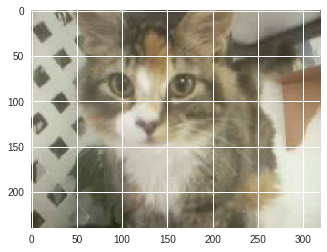

In [16]:
# check out an image
import os

# Just to be safe, reinstall PIL

# .listdir() = Return a list containing names of entries in dir given by path.
files = os.listdir(f'{PATH}valid/cats')[:5] 
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

In [17]:
# check out dimesions of raw image (underlying data that makes up the cat pic)
img.shape

(240, 319, 3)

So,  the above image has 3 dimensions in an array, or a **RANK-3 TENSOR** 

In [18]:
# see 1st 4 rows and cols of the above image
img[:4,:4]

array([[[175, 171, 159],
        [176, 172, 160],
        [178, 174, 162],
        [181, 177, 165]],

       [[175, 171, 159],
        [176, 172, 160],
        [178, 174, 162],
        [181, 177, 165]],

       [[176, 172, 160],
        [177, 173, 161],
        [179, 175, 163],
        [182, 178, 166]],

       [[177, 173, 161],
        [178, 174, 162],
        [180, 176, 164],
        [183, 179, 167]]], dtype=uint8)

Each cells has 3 RGB pixel values. We will attempt to use these pixel values to predict if a picture is a cat or dog.

## 1st model: A Quick Start

Using a *pre-trained* model (created by some one else to solve a different problem) instead of building one from scratch to solve a similar problem. 

Using **resnet34** model, trained on **ImageNet** (1.2M images, 1k classes) as a starting point = a CNN = type of NN that builds state-of-the-art models for CV

(resnet34])[https://github.com/KaimingHe/deep-residual-networks] = a version of the model that won 2015 ImageNet competition. 

Train + evalulate dogs v. cats model in 4 lines of code, under 20 seconds:

In [19]:
arch = resnet34

# 'data' will contain the validation and training data 
#      specify w/ img size from before
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,sz))

# put model into 'learn'
learn = ConvLearner.pretrained(arch, data, precompute=True)

# set learning rate to .01 (how much to multiply gradient step in GD)
# setting epoch = 2 = looking over entire *validation* set of images 3 times
learn.fit(.01,3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 20755285.82it/s]


100%|██████████| 32/32 [00:14<00:00,  2.24it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.068239   0.032345   0.987     
    1      0.054981   0.02751    0.991     
  9%|▉         | 33/360 [00:01<00:18, 17.85it/s, loss=0.0519]

    2      0.046366   0.03154    0.9885    



[array([0.0315]), 0.9885]

The above prints out  

* `[epoch# value of loss function (cross-entropy loss) for training, value of loss function for validation, accuracy]`

Prior to this competition, state of the art (2013) = 80% accuracy, + competition resulted in a huge jump to 98.9% accuracy via the author of a popular DL library. Extraordinarily, < 4 years later, we can now beat that result in seconds, + even last year in this course, initial model = 98.3% accuracy, nearly double the error just a year later, + that took ~10 minutes to compute.

### Analyzing Results

Can look at overall metrics like above, as well as examples of:

* random correct labels
* random incorrect labels
* most correct labels of each class (highest probability of that're correct)
* most incorrect labels of each class (highest probability of that're incorrect)
* most uncertainlabels (probabilty closest to .5)

In [20]:
# look at labels for validation data (cats = 0, dogs = 1)
print(data.classes,"\n")
print(data.val_y)

['cats', 'dogs'] 

[0 0 0 ... 1 1 1]


In [21]:
# learn.predict() return predictions for validation set (in log-scale)
log_preds = learn.predict()
print(log_preds.shape)

(2000, 2)


In [22]:
# gotten 2000 predictions of probabilities of 2 labels
# look @ 1st 10 predictions in [dog log prob, cat log prob] format
log_preds[:10]

array([[-0.0006, -7.4036],
       [-0.0015, -6.4976],
       [-0.0003, -8.1377],
       [-0.0003, -8.0912],
       [-0.0001, -9.393 ],
       [-0.0005, -7.6799],
       [-0.0001, -9.4872],
       [-0.0059, -5.1392],
       [-0.0006, -7.3704],
       [-0.0128, -4.3643]], dtype=float32)

In [0]:
# cobvert probabilities (across cols w/ axis=1) to binary label
preds = np.argmax(log_preds, axis = 1)

# get probability of being a dog and of being a cat
probs_dog = np.exp(log_preds[:,1])
probs_cat = np.exp(log_preds[:,0])

# set probs for plots below as probs_dog
probs = probs_dog

In [24]:
print("label predictions",preds[:5])
print("probability of being a dog",probs_dog[:5])
print("probability of being a cat",probs_cat[:5])

label predictions [0 0 0 0 0]
probability of being a dog [0.0006 0.0015 0.0003 0.0003 0.0001]
probability of being a cat [0.9994 0.9985 0.9997 0.9997 0.9999]


In [0]:
def rand_by_mask(mask):
  return np.random.choice(np.where(mask)[0], 4, replace=True)

def rand_by_correct(is_correct):
  return rand_by_mask((preds == data.val_y) == is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows,len(ims)//rows, i+1)
    sp.axis('Off')
    
    if titles is not None:
      sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])
  
# def plot_val_with_title(idxs,title):
#  imgs = np.stack([data.val_ds[x][0] for x in idxs])
#  title_probs = [probs[x] for x in idxs]
#  print(title)
#  return plots(data.val_ds.denorm(imgs), rows=1, title=title_probs)

def load_img_id(ds,idx):
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs,title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly Classified


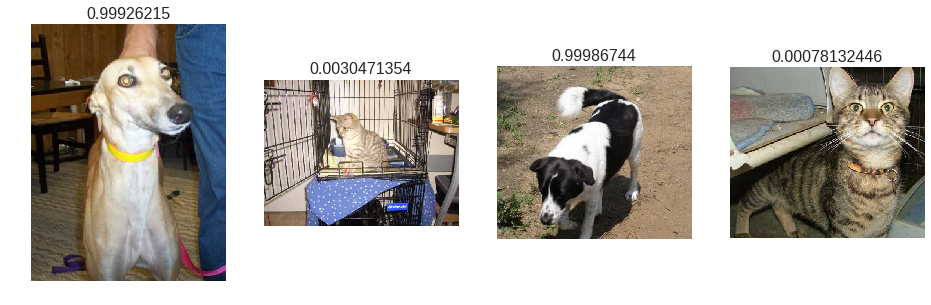

In [27]:
# look at some random correctly labelled images
plot_val_with_title(idxs=rand_by_correct(True),title='Correctly Classified')

Incorrectly Classified


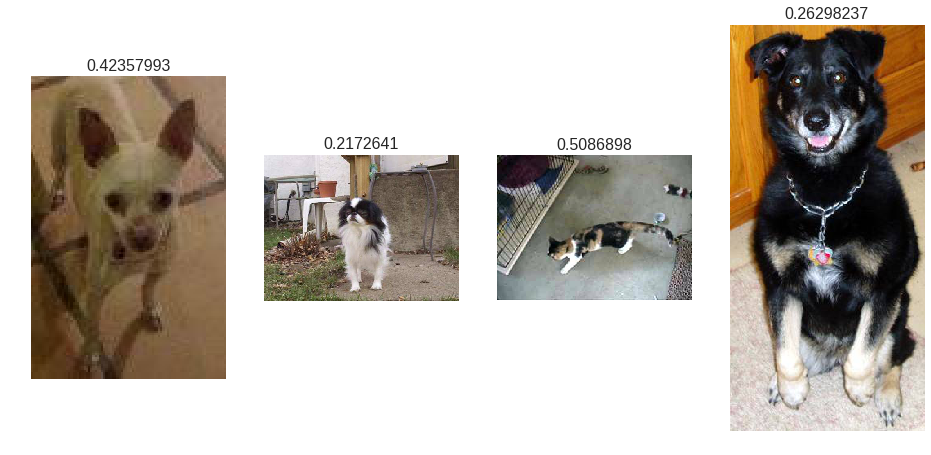

In [28]:
# look at some random incorrectly labelled images
plot_val_with_title(idxs=rand_by_correct(False),title='Incorrectly Classified')

In [0]:
def most_by_mask(mask,mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult*probs[idxs])[:4]]

def most_by_correct(y,is_correct):
  mult = -1 if (y==1) == is_correct else 1
  return most_by_mask(((preds==data.val_y) == is_correct) & (data.val_y == y), mult)

Most Correct Cats


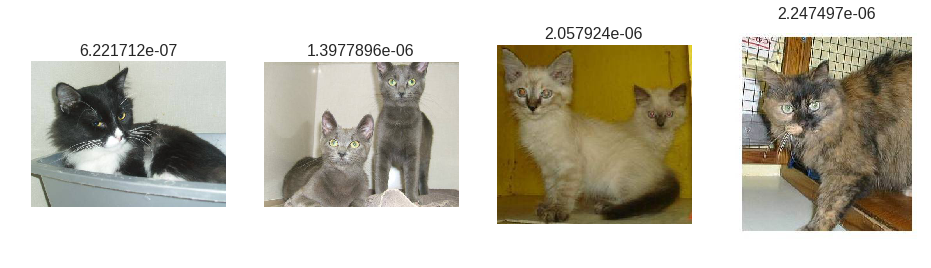

In [30]:
# check which its most confident are cats
plot_val_with_title(most_by_correct(y=0,is_correct=True),'Most Correct Cats')

Most Correct Dogs


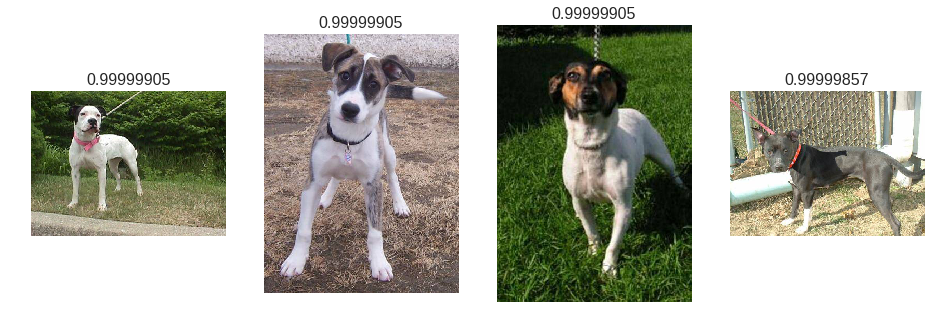

In [31]:
# check which its most confident are dogs
plot_val_with_title(most_by_correct(y=1,is_correct=True),'Most Correct Dogs')

Most Incorrect Cats


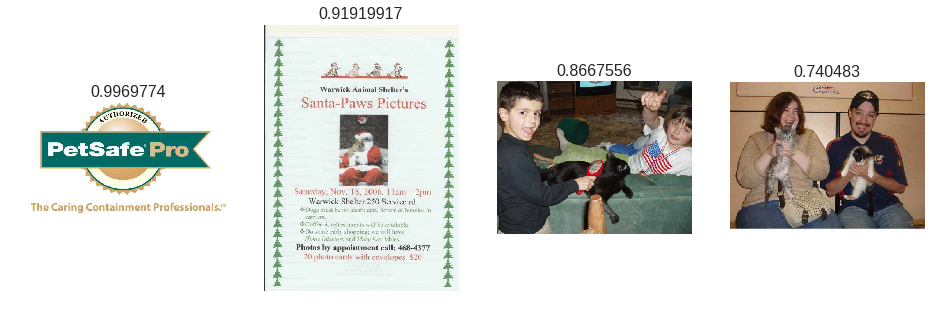

In [32]:
# what it thinks are correct (thinks are dogs but were actually cats)
# i.e. most confident its a dog but its a cat
plot_val_with_title(most_by_correct(y=0,is_correct=False),'Most Incorrect Cats')

Most Incorrect Dogs


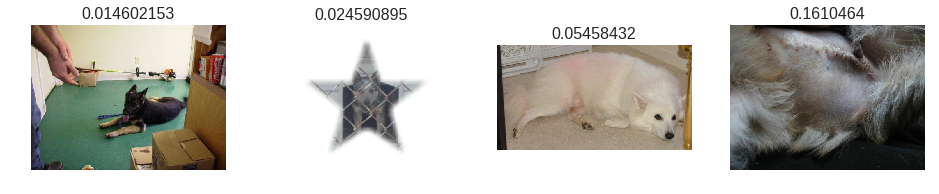

In [33]:
# what it thinks are incorrect (thinks are cats but were actually dogs)
# i.e. most confident its a cat but its a dog
plot_val_with_title(most_by_correct(y=1,is_correct=False),'Most Incorrect Dogs')

Most uncertain about


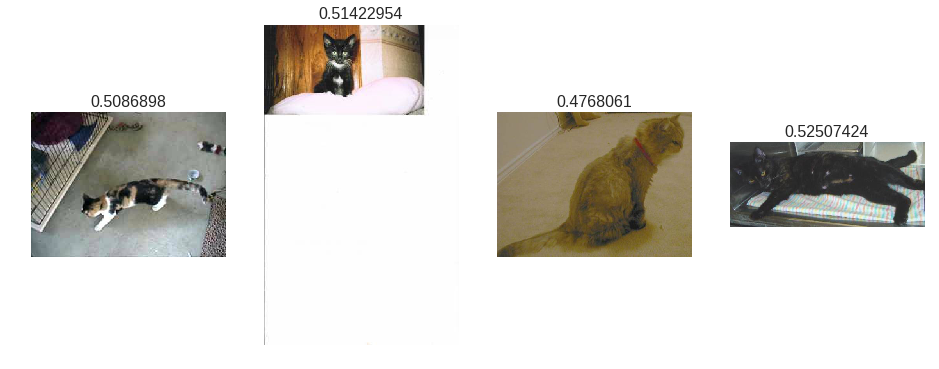

In [34]:
# see which imgs its most uncertain about (probability closest to threshold of .5)
# sort images after subtracting .5 and grab smallest (closes to .5 originally)
most_uncertain = np.argsort(np.abs(probs -.5))[:4]
plot_val_with_title(idxs=most_uncertain,title="Most uncertain about")

We want to look at our data b/c to double check what model is doing well and what it's doing badly (and may need to be fixed), and also to learn things about the data set ( such as what imgs shouldn't be there, like the logos).

One could now grab data (of different things) and put them into a similar dir structure as dogs and cats above and run the same model on it.

### Deep Learning

* from Arthur Samuel's chess-playing software (father of ML)
* traditional ML = difficult and knowledge + time-intensive
* See: Andrew Beck = computational pathologist (CPATH) @ Stanford (now @ Harvard)
  * took pathology slides of cancer, worked w/ many pathologists to figure out what patterns/features were associated w/ long-term survival vs. dying quickly
  * them, programmers wrote algorithms to capture said features that were passed into a logistic regression to predic survival (more accurate than real-life pathologists)
  * this approach took many years of work from domain experts + CS to build
* now much easier w/ DL = contains an **infinitely flexible function**, an **all-purpose parameter fitting** to fit parameters correctly to run the right function that is also **fast and scalable**
* gives a class of functions
* underlying function of FL = **neural network (NN)**  = nonlinear function composed of sums, likelihoods, and S
* NN = consists of a # of simple linear layers interspersed w/ simple non-linear layers
* interspersing supports **universal approximation theorem** = this kind of function can solve any kind of problem to arbitrarily close accuracy as long as enough parameters are added + are added *correctly* (i.e. NN are *proveably* shown to be an infinitely flexible function)
*  all-purpose parameter fitting is done typically via **gradient descent (GD)** = for different parameters, how good are they at solving the problem --> then figure out a slightly better set of parameters + follow the surace of the resulting loss function results downwards until finding the minimum, trying to hit global instead of local minima)
  * turns out, for NN in particular, there aren' actually mult. different local min, just one
  * i.e. there're different parts of the space that're equally good
  * problem = need to do the above in reasonable amt of time
  * GPU's have made this possible (~10x faster than CPU on log scale + are also cheaper)
* Unfortunately, turns out just 1 hidden layer requires exponentially increasing # of params to support universal approximation theorem = *not fast + scalable*
* this is solved via *multiple* hidden layers = super linear scaling (i.e. just a few more hidden layers = multiplicatively more accuracy to  multiplicatively more complex problems)
* this gives rise to **DL** = NN's w/ mult. hidden layers (father = Geoffrey Hinton [Google Brain, 2012])

In our CNN above, the key piece = the **convolution**
* convolution will go over the img pixels via a 3x3 grid to take the pixel w/in the grid + multiplies them by a 3x3 matrix of 9 **kernel values** + adds up the sum
* CNN then trys to find **edges** in the result of these resulting 3x3 matrix multiplication results
* this linear operation can make up a layer in our NN
* then we add a non-linear layer (takes input value + transforms it non-linearly, like sigmoid)
*  Now we typically use a **rectified linear units** (**Rectifier** or **ReLU's**) = take any negative values + replace w/ 0 + leave positive values as-are (`y = max(x,0)` in math terms to do the replacing)
* Key point of combo of linear layer into non-linear function layer = allows us to create arbitrarily complex shapes + combine them together to get to the essence of the universal approximation theorem + why NN's can solve many computable problems

To set these parameters, we use **stochastic (random) GD**
* basic idea = pick random points, move a little bit to some side, find derivative @ that point = direction that's *downward* = the **gradient**
* then move in this direction if its downward (towards the minimum)
* until we reach the minimum
* $x_{n+1} = {x_n} + \frac {dy} {dx}\lambda$
* $\lambda$ = **learning rate** = only want to take a small step in direction of the gradient b/c too large of a step leads to **divergence** not **convergence**
  * but too small = too long to converge
* check out (https://neuralnetworksanddeeplearning.com/chap4.html)

Combination of a convolution, non-linearity layers, + learning SGD = w/ enough kernels/layers, we can actually draw out the original images == i.e. very rich capabilities

This is what the cat vs. dog classifier did above





### Choosing a learning rate

**Learning rate** = how quickly/slowly to update the **weights**/**parameters** = 1 of the most difficult parameters to set, as it significantly affects model performance

Method `learn.lr_find()` from `fastai` library helps find optimal learning rates via a technique developed in [Cyclical Learning Rates for Training Neural Networks (Leslie Smith, 2015)](https://arxiv.org/abs/1506.01186) = keep increasing learning rate from very small value until **loss** stops decreasing (how far prediction is from goal) + then plot learning rate across **batches** to see what it looks like.
* finds at what point during GD we saw best improvement, then use that learning rate
* end up plotting learning rate vs. loss to find best value

1st, create a **learner** b/c we want to know how to set the learning rate for a new (untrained) model


In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [36]:
lrf=learn.lr_find()

 83%|████████▎ | 298/360 [00:08<00:01, 33.44it/s, loss=0.514]


See our model was trained again but the model stops @ 84%, before the loss got too bad

`learn` object contains attribute = `sched` = contains our **learning rate scheduler** = has some convienent plotting functionality, such as 

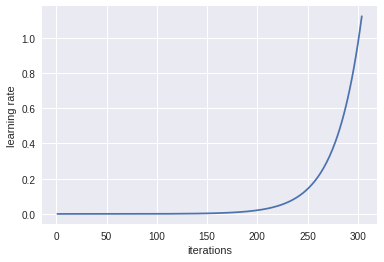

In [37]:
# how learning rate value increases w/ more iterations/minibatch of GD
learn.sched.plot_lr()

See learning rate increases exponentially after some **iteration/min-batch** of SGD 
* w/in each epoch, there's `num_train_samples/num_iterations` minibatches of SGD

Can then look @ learning rate vs. loss to see where loss stop stops decreasing

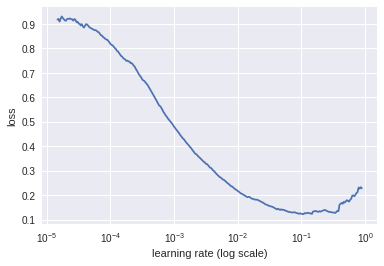

In [38]:
learn.sched.plot()

Want to find the highest possible learning rate such that loss is still decreasing/improving, which looks to be @ about =1e-2 (or 0.01)

So we use .01 in our `learn.fit()` call.

***Note***: Optimal learning rate can change as  model is trained, so you may want to re-run this function from time to time.

**Epoch** = go through the dataset and each time grab (say 64) images + use each of them once to try + improve the model a bit w/ GD
* choice of # of epochs = arbirtrary
* too many = accuracy may start getting worse
* may take too long w/ a large model/lots of data, so we just run enough epochs in time that's available

### Results

`[0.     0.064  0.0254 0.9907]
[1.     0.0511 0.0234 0.9912]
[2.     0.0552 0.0254 0.9893]`

These = our epochs, training loss, validation loss, + accuracy (want low loss, as **log loss = increasing penalties for being inaccurate w/ increasing confidence**)

### Learning Rate

LR = thing that decides how quickly we'll "zoom in" on the correct solution (minimum point of the function via the gradient + its direction = GD)
 * steeper gradient = further away
 
 Then multiply this gradient by the LR
 * too small = takes too long
 * too large = could overstep in that direction + then oscillate back + forth + end up getting further and further away = **divergence** = loss/accuracy going to infinity
 
 LR Finder will, in each iteration, look @ minibatch (some random imgs, 64-128 @ a time generally), use some small LR and then generally increase it w/ each iteration until LR is so big that loss starts getting worse (increasing)
 
 Want to look at that learning rate vs. loss plot + find the smallest LR such that loss is still decreasing 
 
We are **NOT** looking for the minimum = this is where loss is actually not getting better = LR is too high
 
Try looking @ min + going back 1 magnitude, say around `10e-2` above

Right now, this is the only hyperparameter we're tuning, and by playing w/ it = can get pretty good results

Most other hyperparameters are tuned by fastai lib (dozens of 'em and difficult to set)

BTS, fastai is trying to find the *correct GD version using the **[Adam optimization algorithm(https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)**

Most import thing **for \*\*\*\*DL\*\*\*\* algorithms** = more data

Challenge = hundreds of millions of parameters + after being trained for a while on data = overfitting starts (i.e. recognizing patterns specific to training data that're not true underlying patterns and won't generalize to new data)

Easier way to do this rather than collecting more data = ***data augmentation***, which is build into fastai lib

In the initial model code, we passed `tfms=tfms_from_model(arch,sz)` which were the **transforms** for the data (architecture and size), but we can also pass in a **list of specific data augmentation functions** into augment transforms arg = `aug_tfms`, such as `transform_side_on` = used if we have photos taken from the side, so we'd want to flip the horizontally (not vertically), rotate them by *smalll* amnts, + slightly vary brightness + contrast, lightly zoom in + out, etc. to get *slightly* different views of same image = **slightly changing data such that interpretation shouldn't be impacted**
* e.g. most photos of dogs +  cats = take from side so these functions work well for their pics, as opposed to photos taken from the top down like satellite imagery = `transforms_top_down`
* `transforms_side_on` = predefined list of functions
* also enable the random zooming of images up to specified scale of 1.1 via `max_zoom` parameter



In [0]:
# use resnet34 architecure, predefined image size of 224 in `sz`, list of augmentation functions, and max_zoom scale parameter
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

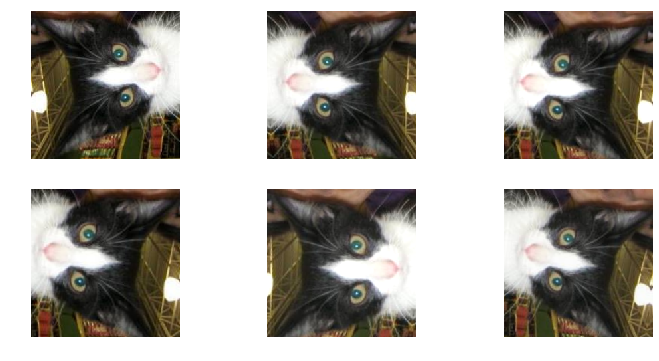

In [41]:
# this builds x different data classes via range(x) of the ***SAME** image
ims = np.stack([get_augs() for i in range(6)])

# plot x different classes of the same image
plots(ims, rows=2)

Doesn't *exactly* create new data, but it's a different way of looking @ things for the CNN + allows it to "learn" to see cats + dogs @ different angles by messing with images but keeping the same image

can now pass in our set of transforms `tfms` into `ImageClassifierData` for a new dataset and the learn on it

In [42]:
arch = resnet34
# use new transforms
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
# put model into 'learn'
learn = ConvLearner.pretrained(arch, data, precompute=True)

# set learning rate to one from plot above = 1e-2 in 2 epochs
learn.fit(1e-2,2)

epoch      trn_loss   val_loss   accuracy   
    0      0.0567     0.030523   0.9895    
    1      0.054277   0.028789   0.9905    



[array([0.0288]), 0.9905]

*Initially, augmentations don't do anything b/c of `precompute=True`*
* this is b/c layers of the NN have **activations**  (#'s) that say some feature (say eyeball of bird) is in some location w/ some level of confidence (probability)
* we have a *pre-trained* network that is trained to see/recognize certain things (~1.5M imgs in ImageNet dataset)
* can, for every image, take the 2nd-to-last layer (all info necessary to classify something) + **save those activations**
* these are our **precomputed activations**
* idea = when we want to create a new classifier that takes advantage of these precomputed activations to create a simple linear model
* may take a while to compute these (only has to do it once for a dataset, forever)
 
 This prevents our augmentation from working, so we need to turn it off before training



In [43]:
learn.precompute=False
learn.fit(1e-2,3,cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.039841   0.027013   0.9915    
 51%|█████     | 184/360 [01:32<01:28,  1.99it/s, loss=0.0384]

    1      0.040891   0.026414   0.99      
    2      0.032361   0.027404   0.99      



[array([0.0274]), 0.99]

takes longer now

we got 

`[0.     0.0347 0.027  0.9912]
[1.     0.0372 0.0259 0.9907]
[2. 0.037  0.0257 0.9912]`

`[0.     0.0403 0.0253 0.9897]
[1.     0.0434 0.0238 0.9907]
  [2.     0.0352 0.0233 0.9917]`

Good news = training error decreasing
bad = validation isn't so much

BUT we're *not* overfitting (training loss << validation loss b/c doing better on training set)

BUT we're not really improving

idea of `cycle_len=1` = from recent discovery = **SGD *w/ restarts (SGDR)* = a variance of *learning rate ANNEALING*** = gradually decreases LR as training progresses  = helpful b/c *as we get closer to optimal weights, we want to take smaller steps so that we get to exactly the right spot for the solution for the function*
* most annealing done w/ some function from = typically **cosine annealing** = uses 1/2 of cosine curve (not close = high LR, drop it quickly, then quickly drop it + do some iterations w/ low LR, looking like horizontally-flipped sigmoid)

In high-dimensional spaces, we have many "flat" spaces that are not actually minima, all of which are pretty good
* solutions may not generalize well (bottom of a v on the loss plot)
* some of these flat pts = if we move a bit more in either direction on bottom of loss curve, we don't lose much accuracy (more robust)
* so we use a **learning rate schedule** which does the cosine annealing, then increases the LR, and repeats
* jumps out frmo "spiky" parts of the curve until it finds a flat bowl

May find selves in a part of the **weight space** that is not v. resilient (i.e. small changes to weights may result in big changes to loss)

Want to encourage model to find both *accurate and stable* areas of weight space

To do so, we, from time to time, **restart** the SGD = slightly increase LR to force model to "jump" to different part of weight space if the the current area "spiky"

`cycle_len` = # of **cycles** = # of epochs between resetting LR (i.e. making it jump again)
* 1 = reset after every epoch, 2 = after every 2 epochs, etc.

Can look at what new learning rates are in w/ this new parameter

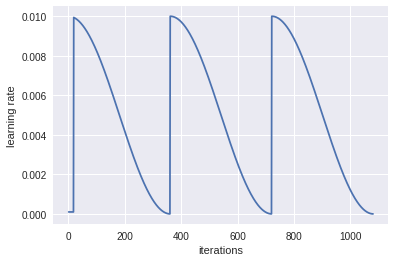

In [44]:
# LR w/ SGDR
learn.sched.plot_lr()

Validation loss is not improving much here == probs no point in further training the last layer on its own

Now we have pretty good model so we can save it to load again later w/out training from scratch

In [0]:
learn.save('224_lastlayer')

In [0]:
# then reload
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

The final layer has now been trained well and loaded in + we can fine tune other layers

In [0]:
# unfreeze other layers
learn.unfreeze()

These layers *have* been trained on ImageNet, contrary to the above final layer non-output layer where we did NOT pre-compute it = they're not randomly initialized

*we have not changed any of these early features/weights on top of the convolutional kernels*
* *all we've done is learn some NEW layers that we've layed on top of these pre-trained layers*

By unfreezing, we're prepared to start changing the convolutional filters

Earlier layers = more general-purpose features (generally speaking), so we use different LRs for different layers = **differential learning rates** (not official name as its not ubiquitous yet)
* 1st few = LR = 1e-4
* then = LR = 1e-3
* final ones = LR = 1e-2 like before
 * use smaller learning rates for earlier layers = they genearlly just can ID diagonal edges and/or gradients + basic geometric  features, so they need little if any new learning
 * later layers = need more learning as they are less general features =  more sophisticated convolutional features
 * final LR = for those features we've added from scratch
 
 do 3 cycles w/ this LR array

In [0]:
lrs = np.array([1e-4,1e-3,1e-2])
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.048833   0.028588   0.9885    
 51%|█████     | 184/360 [03:18<03:10,  1.08s/it, loss=0.0475]

    1      0.037014   0.023475   0.992     
    2      0.032479   0.021628   0.992     
  1%|▏         | 5/360 [00:09<11:31,  1.95s/it, loss=0.0312]

 70%|███████   | 253/360 [04:31<01:54,  1.07s/it, loss=0.0303]

In [0]:
# plot outputs of FINAL layers
learn.sched.plot_lr()

LRs of earlier layers = fixed @ same multiples of the initially-requested final layers (1st layers = 100x smaller, middle = 10x)

`cycle_mult` parameter = doubles the length of each successive cycle (cycle 1, 2x, 4x, etc.)
* if cycle length = too short, it goes down but pops up too quick + never finds a good spot 
* want this to do this earlier to find smooth spots, but then slow down + search the area more

In [0]:
!ls

In [0]:
# save updated model layers
learn.save('224_all')
learn.load('224_all')

Can also use data augmentation at **inference time/test time** = **test time augmentation (TTA)**, which simply makes predictions not just on validation set but also on randomly augmented versions of them (4 versions, by default) + takes the average prediction from those images

In [0]:
# perform test time augmentation (default = 4 extra imgs)
log_preds, y = learn.TTA()

# convert logs to normal floats and get the mean for
# the img + its augmentations for new probabilities of the image class
probs = np.mean(np.exp(log_preds),0)

# check accuracy on true values
accuracy_np(probs,y)